<a href="https://colab.research.google.com/github/DaDupe01/BAN6800FinalProject/blob/main/OptimizeProductPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_price.csv to retail_price.csv
Saving shopping_trends.csv to shopping_trends.csv
Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [ ]:
import pandas as pd

# Load the datasets
retail_price_df = pd.read_csv("/content/retail_price.csv")
shopping_trends_df = pd.read_csv("/content/shopping_trends.csv")
shopping_trends_updated_df = pd.read_csv("/content/shopping_trends_updated.csv")

# Inspect each DataFrame
print("--- retail_price_df ---")
display(retail_price_df.head())
print(retail_price_df.info())
print(retail_price_df.isnull().sum())

print("\n--- shopping_trends_df ---")
display(shopping_trends_df.head())
print(shopping_trends_df.info())
print(shopping_trends_df.isnull().sum())

print("\n--- shopping_trends_updated_df ---")
display(shopping_trends_updated_df.head())
print(shopping_trends_updated_df.info())
print(shopping_trends_updated_df.isnull().sum())

--- retail_price_df ---


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=shopping_trends_updated_df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of 'Gender'
plt.figure(figsize=(6, 6))
sns.countplot(data=shopping_trends_updated_df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

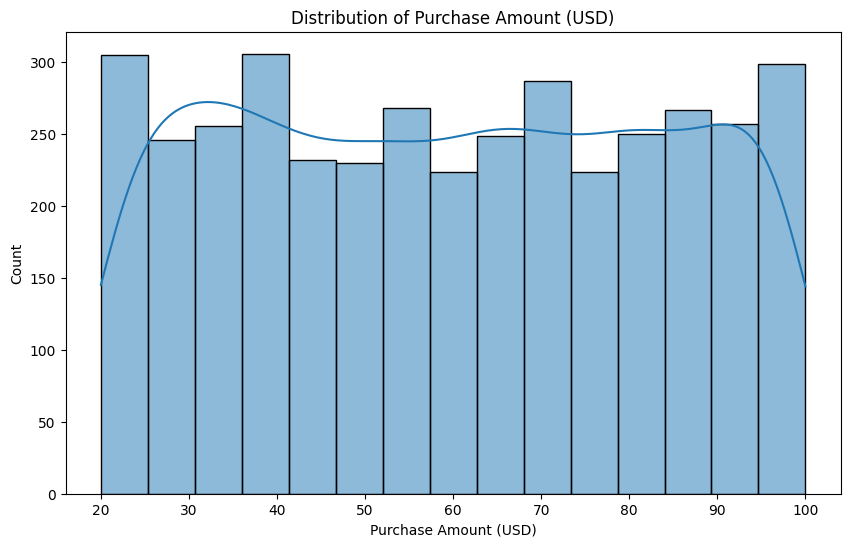

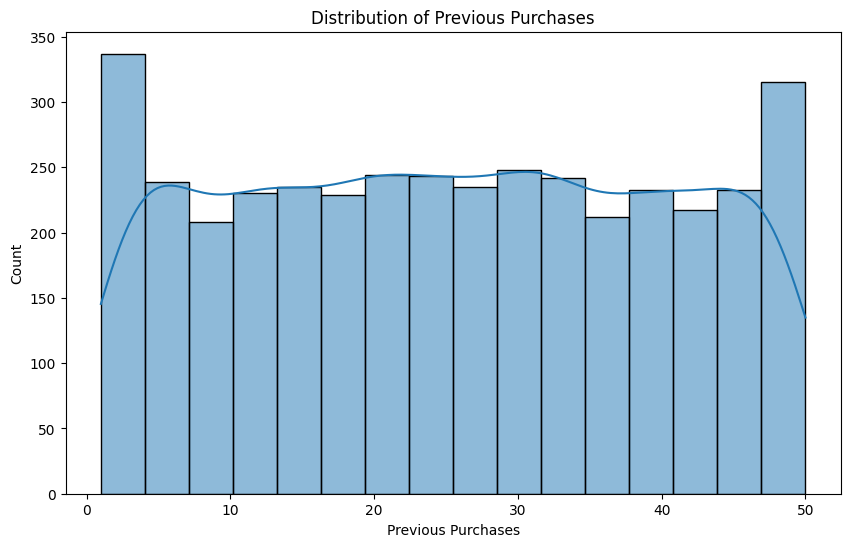

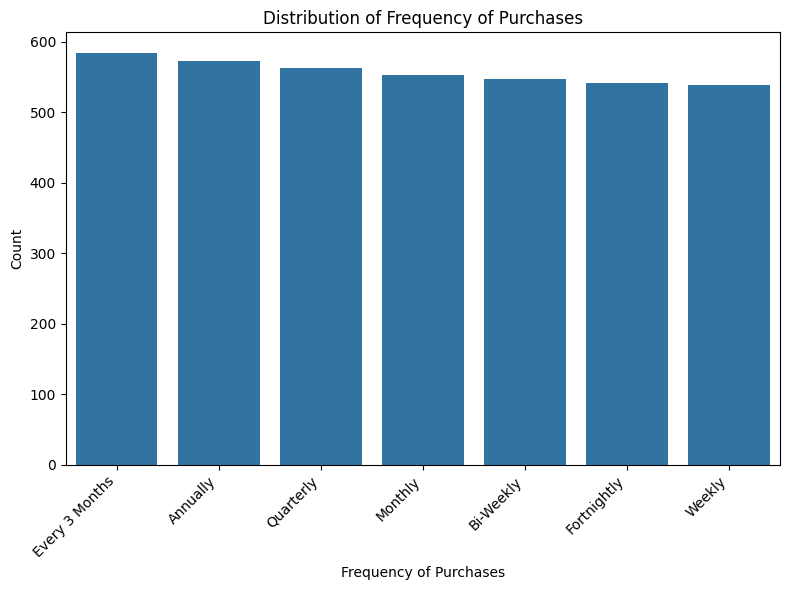

In [ ]:
# Analyze the distribution of 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
sns.histplot(data=shopping_trends_updated_df, x='Purchase Amount (USD)', kde=True)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of 'Previous Purchases'
plt.figure(figsize=(10, 6))
sns.histplot(data=shopping_trends_updated_df, x='Previous Purchases', kde=True)
plt.title('Distribution of Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of 'Frequency of Purchases'
plt.figure(figsize=(8, 6))
sns.countplot(data=shopping_trends_updated_df, x='Frequency of Purchases', order=shopping_trends_updated_df['Frequency of Purchases'].value_counts().index)
plt.title('Distribution of Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between demographic features and purchasing behavior using visualizations such as purchase amount by gender or age groups.



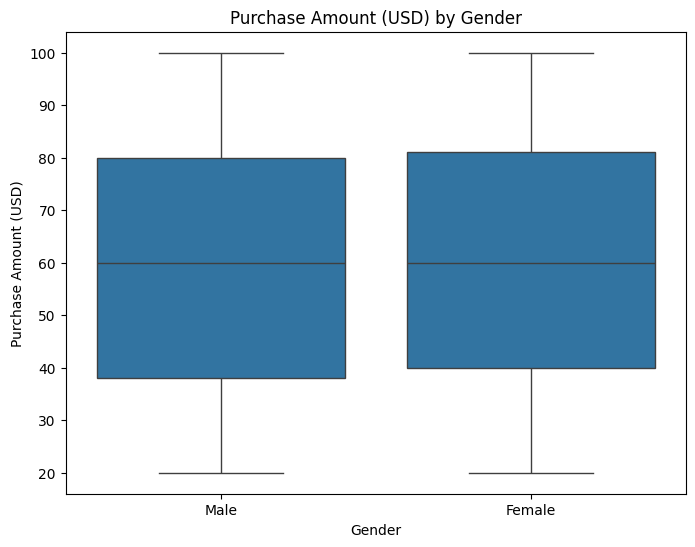

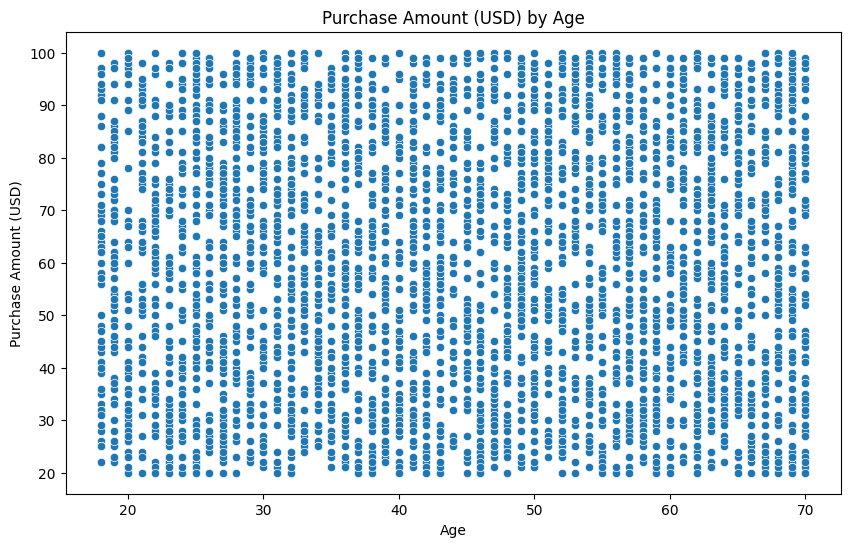

In [ ]:
# Relationship between Gender and Purchase Amount (USD)
plt.figure(figsize=(8, 6))
sns.boxplot(data=shopping_trends_updated_df, x='Gender', y='Purchase Amount (USD)')
plt.title('Purchase Amount (USD) by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Relationship between Age and Purchase Amount (USD) - using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shopping_trends_updated_df, x='Age', y='Purchase Amount (USD)')
plt.title('Purchase Amount (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

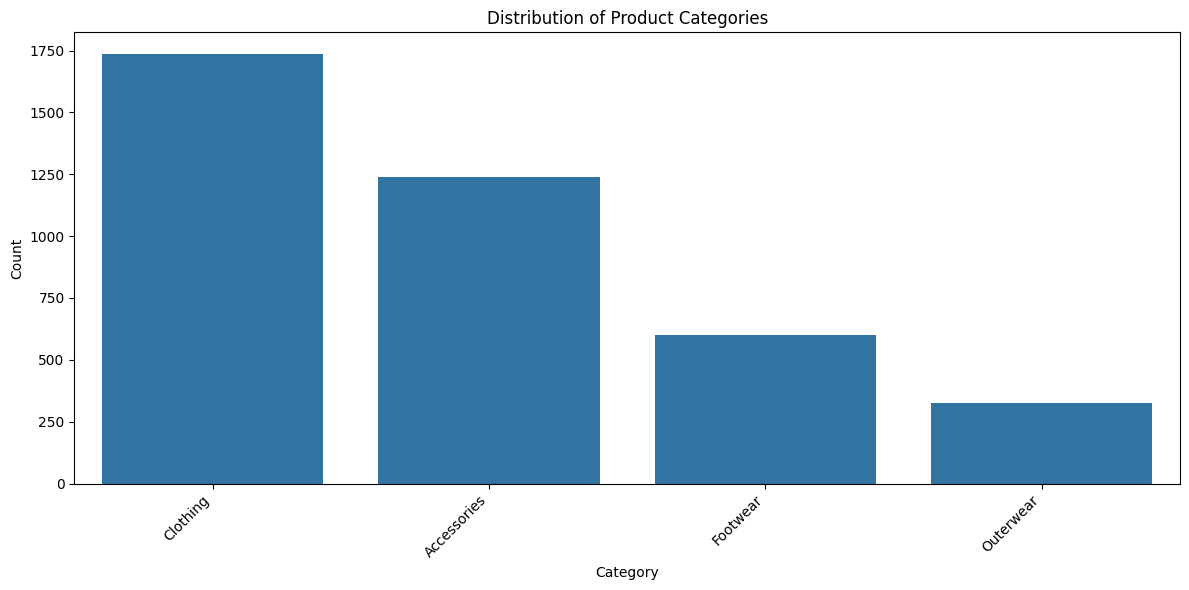

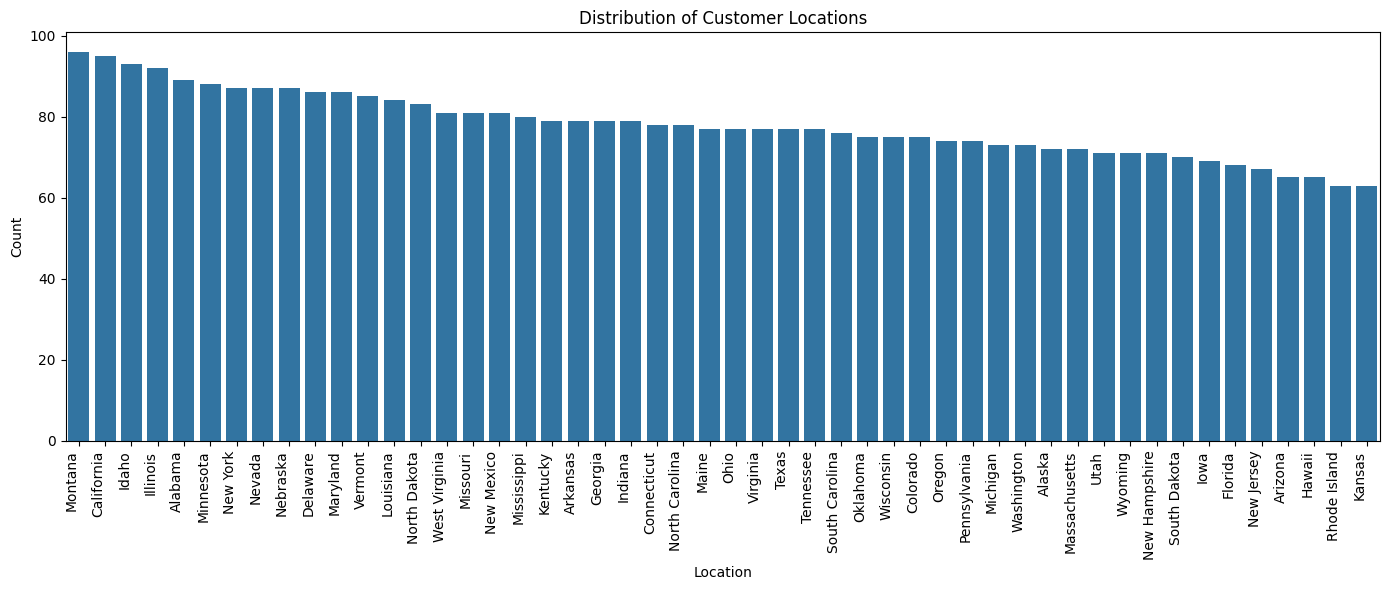

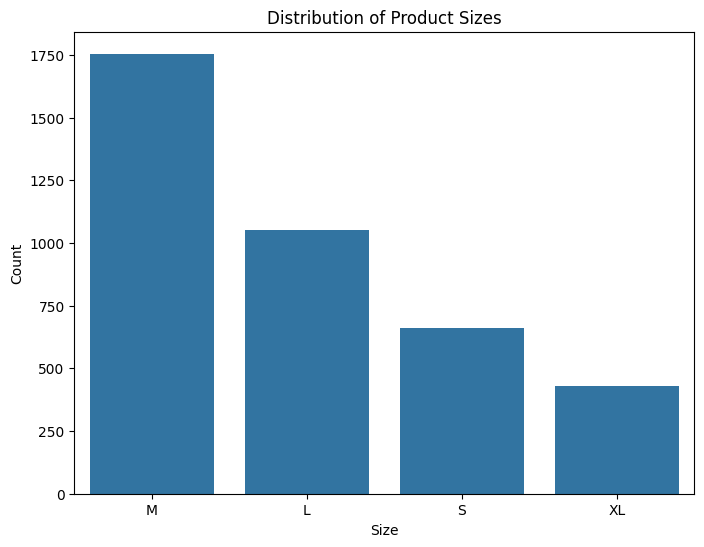

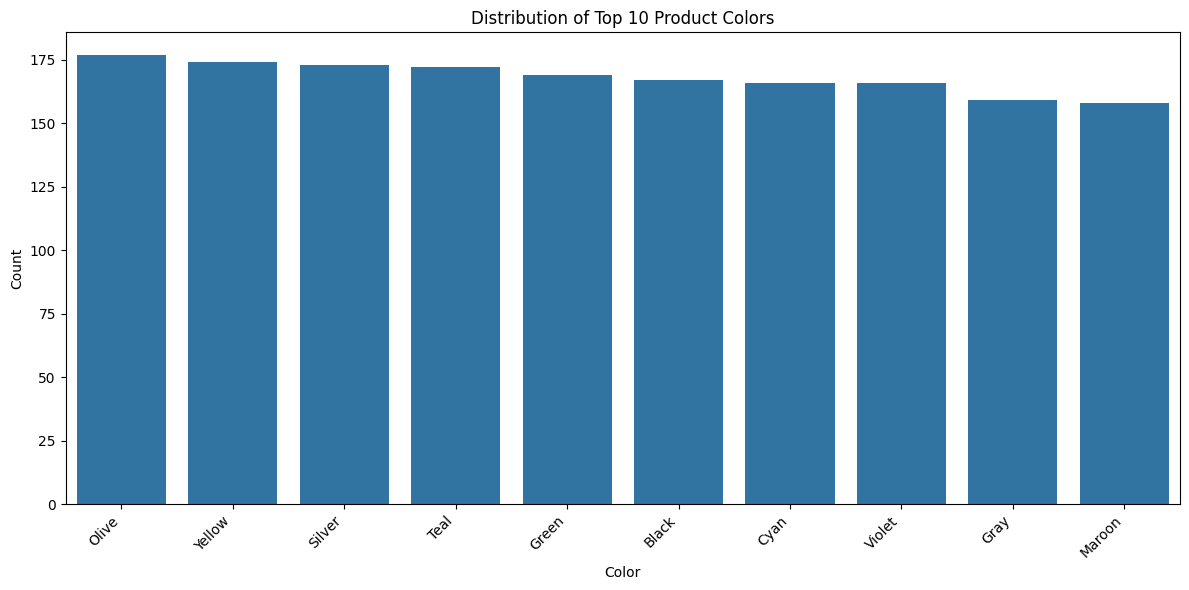

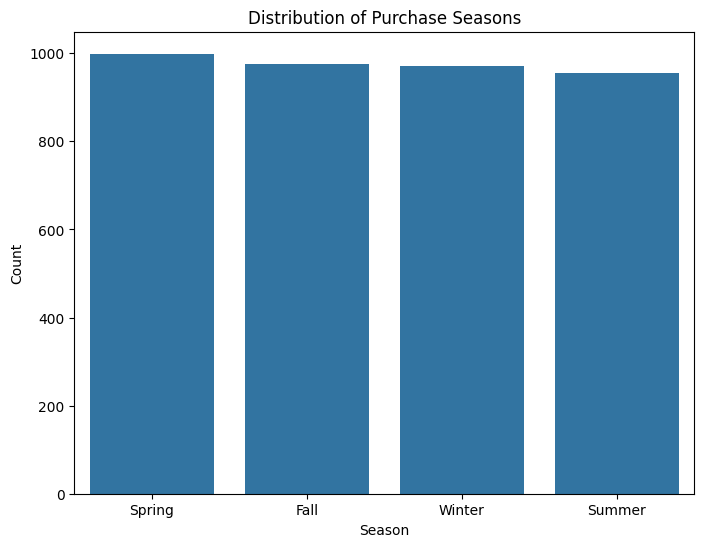

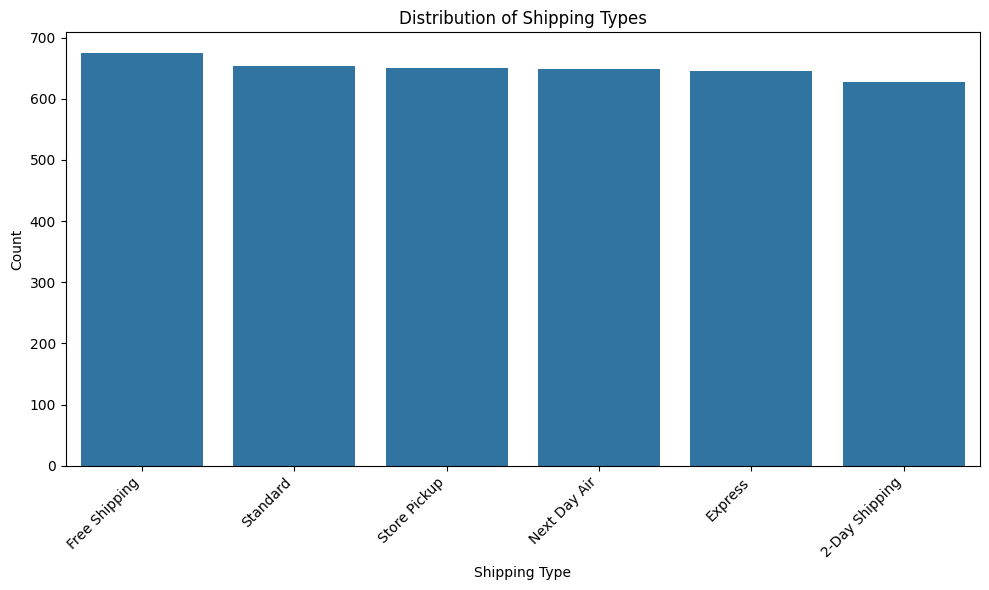

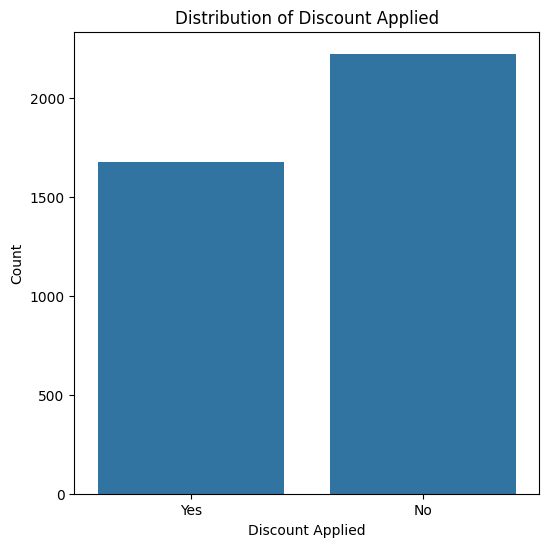

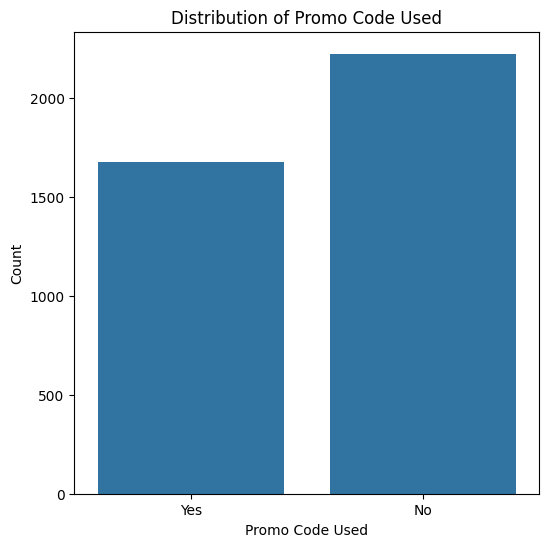

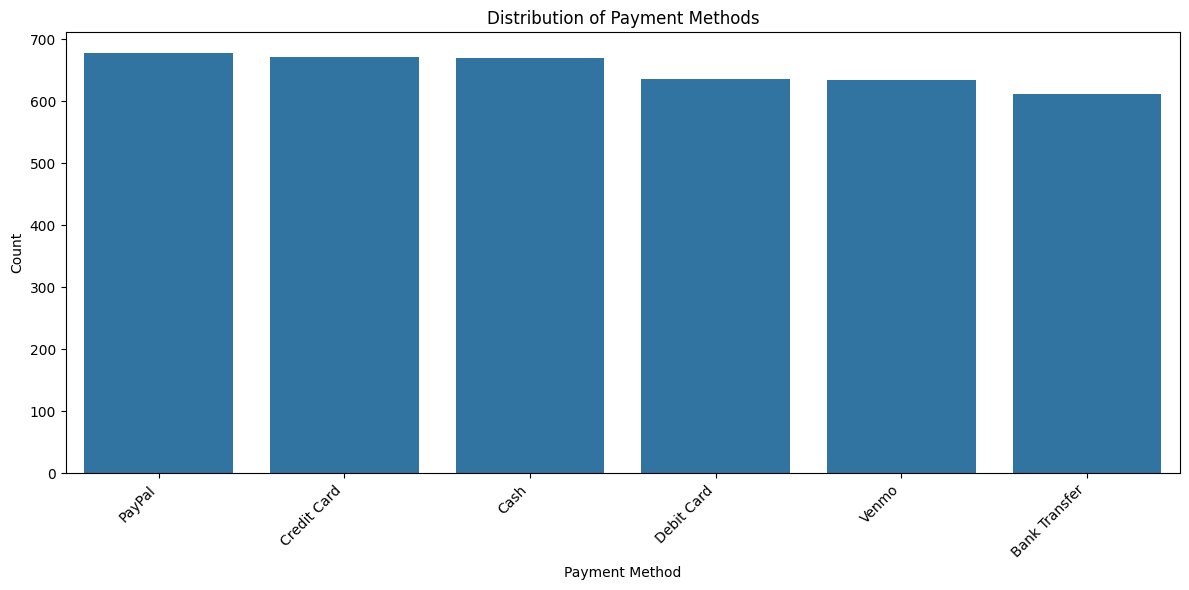

In [ ]:
# Analyze distribution of 'Category'
plt.figure(figsize=(12, 6))
sns.countplot(data=shopping_trends_updated_df, x='Category', order=shopping_trends_updated_df['Category'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze distribution of 'Location'
plt.figure(figsize=(14, 6))
sns.countplot(data=shopping_trends_updated_df, x='Location', order=shopping_trends_updated_df['Location'].value_counts().index)
plt.title('Distribution of Customer Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Analyze distribution of 'Size'
plt.figure(figsize=(8, 6))
sns.countplot(data=shopping_trends_updated_df, x='Size', order=shopping_trends_updated_df['Size'].value_counts().index)
plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

# Analyze distribution of 'Color' (show top N colors for clarity)
top_colors = shopping_trends_updated_df['Color'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=shopping_trends_updated_df, x='Color', order=top_colors)
plt.title('Distribution of Top 10 Product Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze distribution of 'Season'
plt.figure(figsize=(8, 6))
sns.countplot(data=shopping_trends_updated_df, x='Season', order=shopping_trends_updated_df['Season'].value_counts().index)
plt.title('Distribution of Purchase Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Analyze distribution of 'Shipping Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=shopping_trends_updated_df, x='Shipping Type', order=shopping_trends_updated_df['Shipping Type'].value_counts().index)
plt.title('Distribution of Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze distribution of 'Discount Applied'
plt.figure(figsize=(6, 6))
sns.countplot(data=shopping_trends_updated_df, x='Discount Applied')
plt.title('Distribution of Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Count')
plt.show()

# Analyze distribution of 'Promo Code Used'
plt.figure(figsize=(6, 6))
sns.countplot(data=shopping_trends_updated_df, x='Promo Code Used')
plt.title('Distribution of Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')
plt.show()

# Analyze distribution of 'Payment Method'
plt.figure(figsize=(12, 6))
sns.countplot(data=shopping_trends_updated_df, x='Payment Method', order=shopping_trends_updated_df['Payment Method'].value_counts().index)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

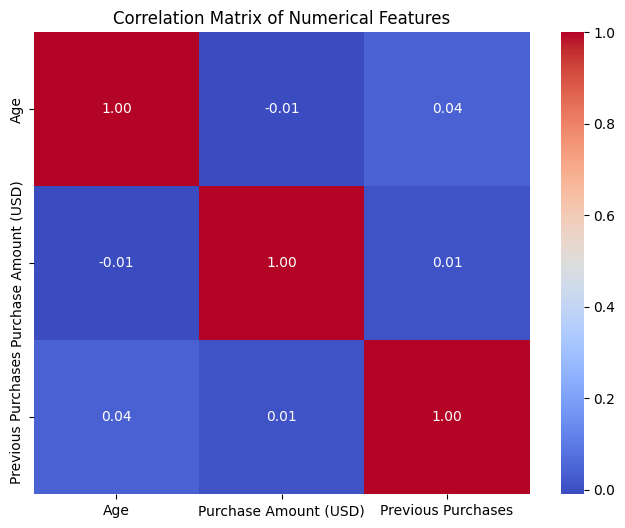

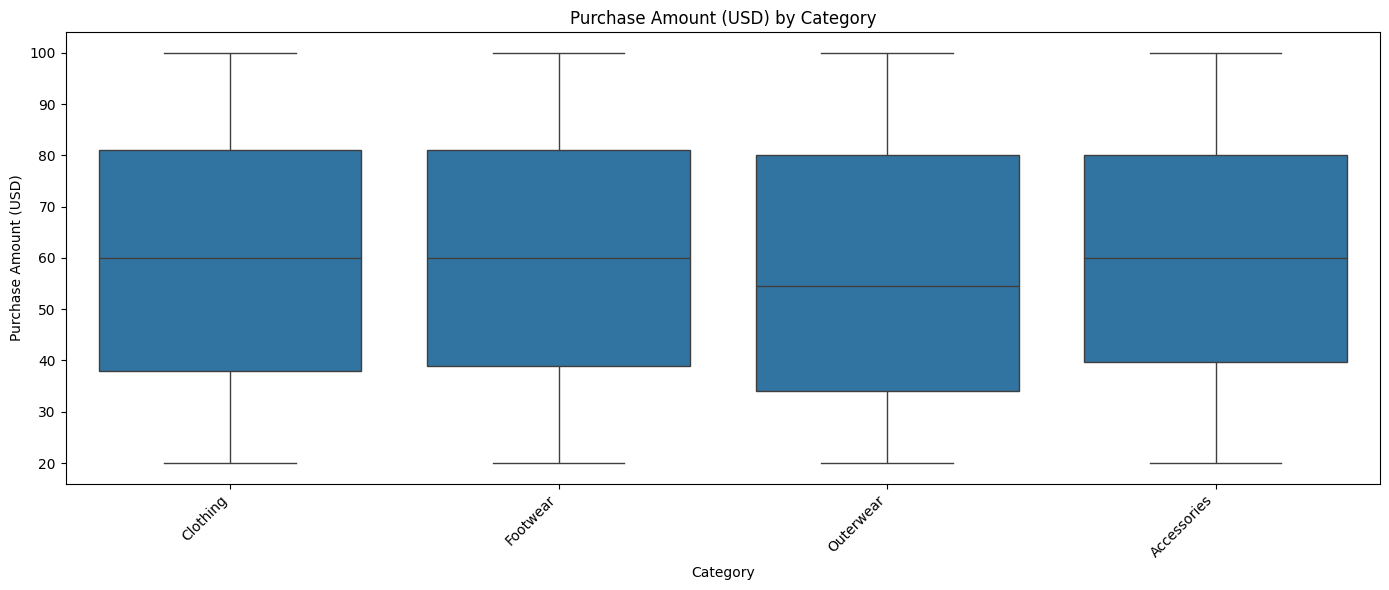

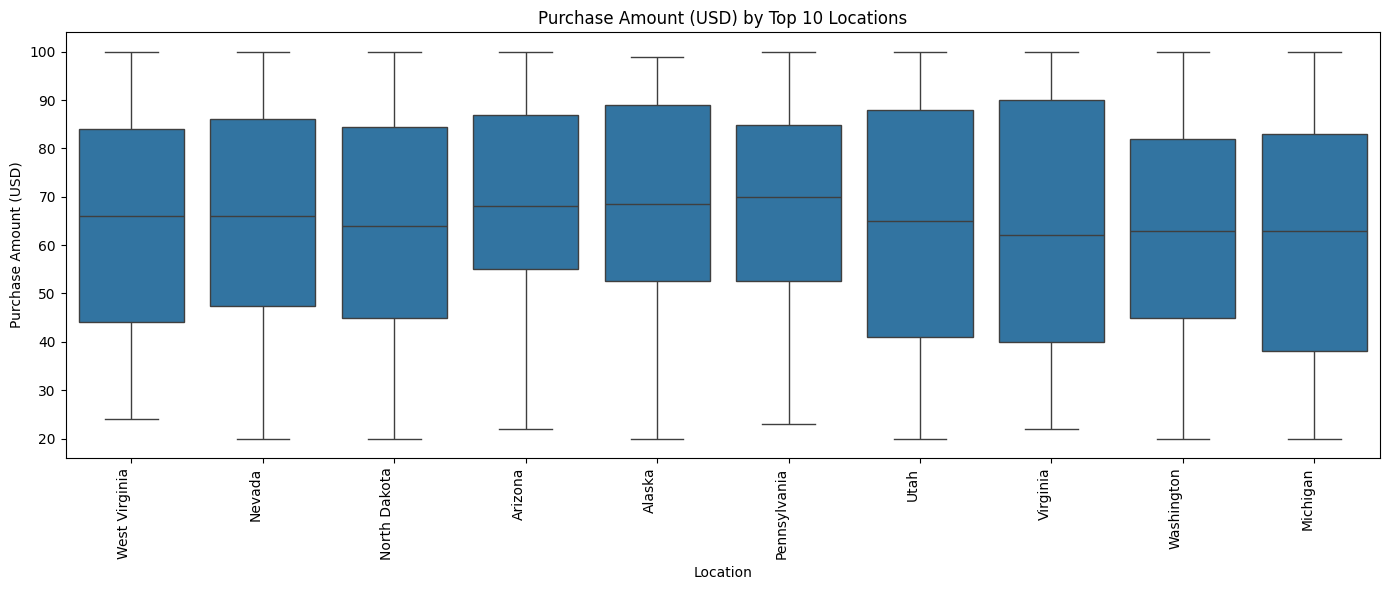

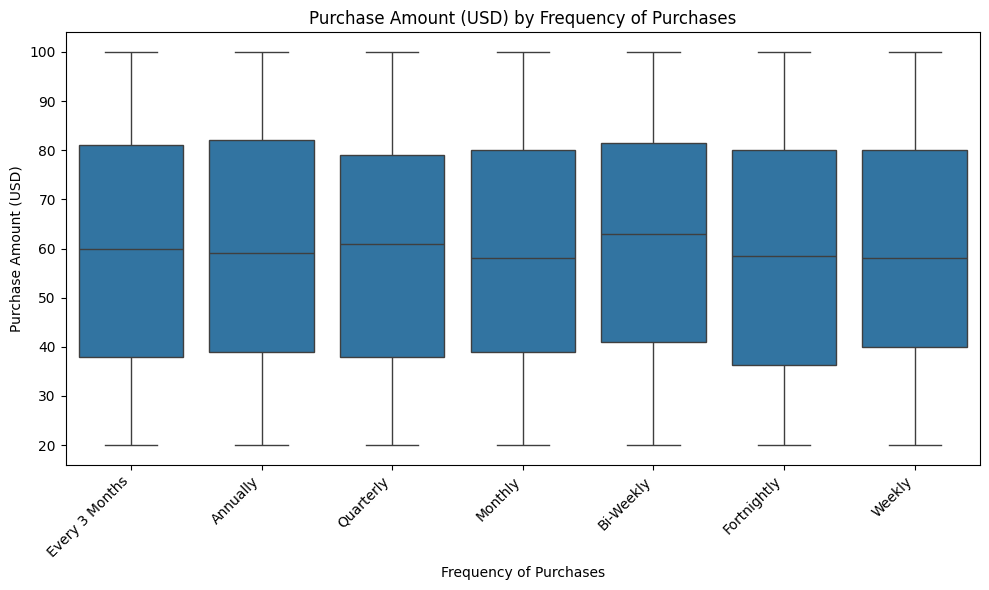

In [ ]:
# Explore correlation between numerical features
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
plt.figure(figsize=(8, 6))
sns.heatmap(shopping_trends_updated_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explore relationship between Category and Purchase Amount (USD)
plt.figure(figsize=(14, 6))
sns.boxplot(data=shopping_trends_updated_df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount (USD) by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explore relationship between Location and Purchase Amount (USD) (show top N locations for clarity)
top_locations = shopping_trends_updated_df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).nlargest(10).index
plt.figure(figsize=(14, 6))
sns.boxplot(data=shopping_trends_updated_df[shopping_trends_updated_df['Location'].isin(top_locations)], x='Location', y='Purchase Amount (USD)')
plt.title('Purchase Amount (USD) by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Explore relationship between Frequency of Purchases and Purchase Amount (USD)
plt.figure(figsize=(10, 6))
sns.boxplot(data=shopping_trends_updated_df, x='Frequency of Purchases', y='Purchase Amount (USD)', order=shopping_trends_updated_df['Frequency of Purchases'].value_counts().index)
plt.title('Purchase Amount (USD) by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

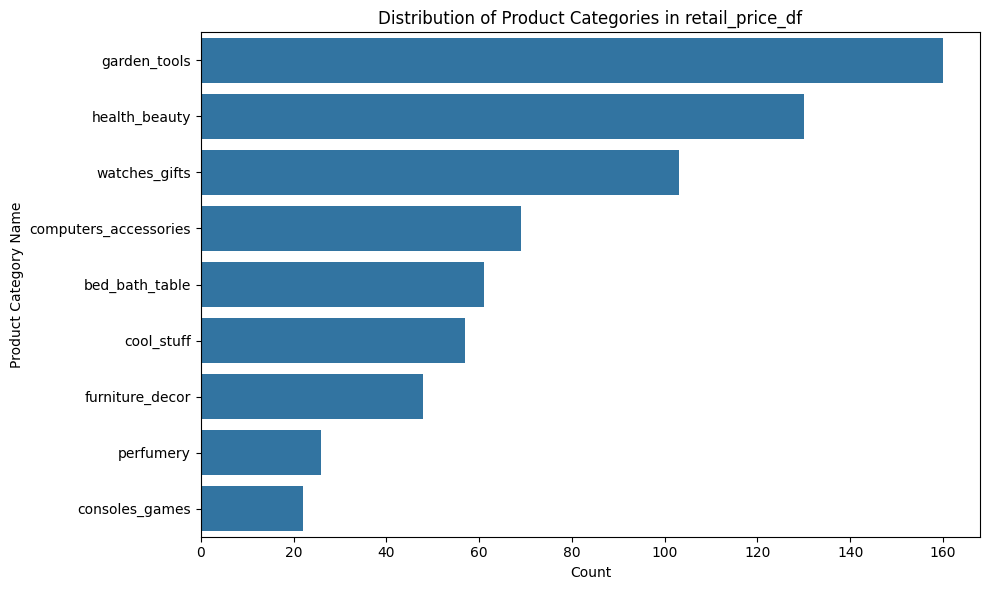

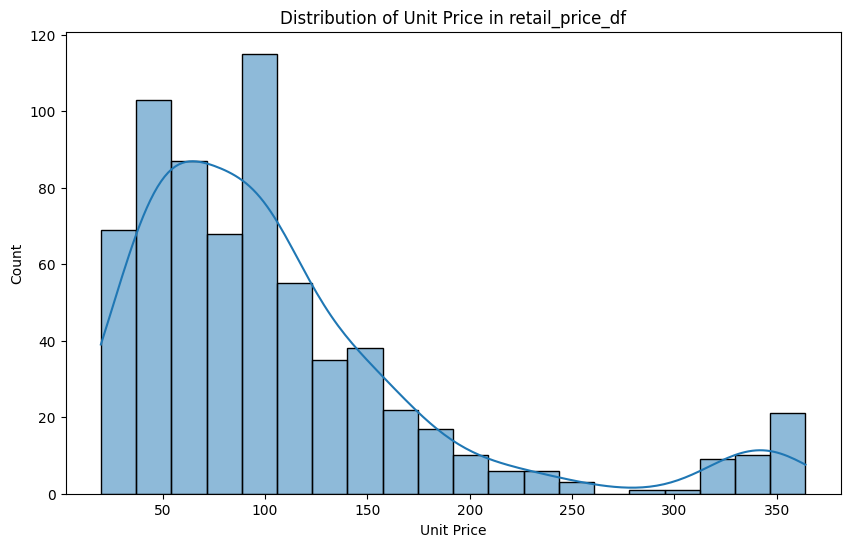

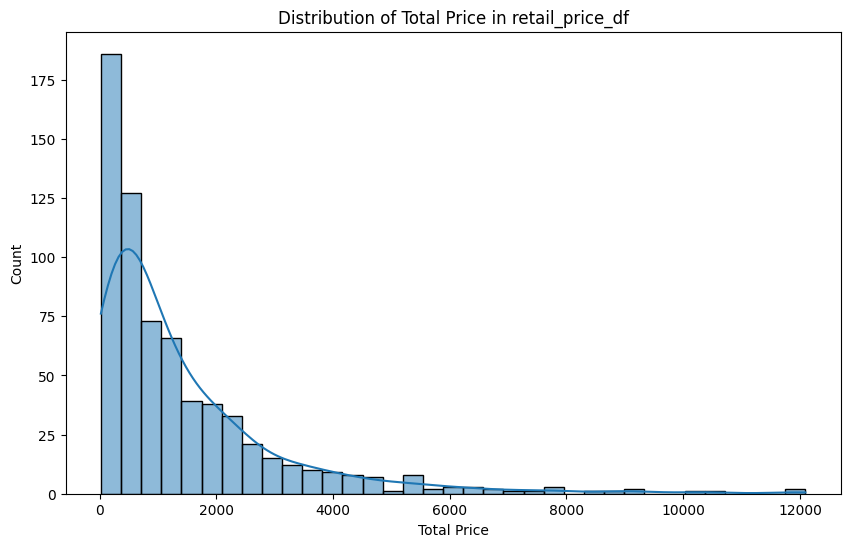

In [ ]:
# Analyze product categories in retail_price_df
plt.figure(figsize=(10, 6))
sns.countplot(data=retail_price_df, y='product_category_name', order=retail_price_df['product_category_name'].value_counts().index)
plt.title('Distribution of Product Categories in retail_price_df')
plt.xlabel('Count')
plt.ylabel('Product Category Name')
plt.tight_layout()
plt.show()

# Analyze the distribution of 'unit_price' in retail_price_df
plt.figure(figsize=(10, 6))
sns.histplot(data=retail_price_df, x='unit_price', kde=True)
plt.title('Distribution of Unit Price in retail_price_df')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of 'total_price' in retail_price_df
plt.figure(figsize=(10, 6))
sns.histplot(data=retail_price_df, x='total_price', kde=True)
plt.title('Distribution of Total Price in retail_price_df')
plt.xlabel('Total Price')
plt.ylabel('Count')
plt.show()

In [ ]:
retail_price_df['month_year'] = pd.to_datetime(retail_price_df['month_year'], format='%d-%m-%Y')
retail_price_df['year'] = retail_price_df['month_year'].dt.year
retail_price_df['month'] = retail_price_df['month_year'].dt.month
retail_price_df['price_per_qty'] = retail_price_df['total_price'] / retail_price_df['qty']

# Assuming 'product_id' is a common column or can be derived for merging
# If no direct common key exists, we might need to consider alternative merging strategies or features.
# For now, we will assume a merge is possible and look for a potential key.
# Let's inspect columns to find a potential merge key.
print(retail_price_df.columns)
print(shopping_trends_updated_df.columns)

# There is no obvious common key to directly merge the two dataframes.
# The retail_price_df is at product level over time.
# The shopping_trends_updated_df is at customer purchase level.
# We cannot directly merge these two dataframes row-wise based on a single key.
# A potential strategy is to aggregate retail_price_df to a level that can be joined with shopping_trends_updated_df,
# or create features from retail_price_df that can be used in the customer-level analysis.
# Given the instruction to combine, we will explore if there's an indirect way or if the instruction implies
# joining information from retail price to customer trends based on product category or item purchased.

# The 'product_category_name' in retail_price_df seems related to 'Category' in shopping_trends_updated_df.
# We can potentially join based on category and perhaps month/year if applicable, but shopping_trends_updated_df
# does not have a date/time column for purchase.
# Let's re-evaluate the merging step (Instruction 4). Without a clear common key at the required granularity,
# a direct merge as implied might not be the most useful approach for creating customer-level features.
# However, the instruction explicitly asks to combine. A possible interpretation is to bring in
# product-level information (like average price per category) from retail_price_df into shopping_trends_updated_df.

# Let's calculate average price per category from retail_price_df and attempt to map it.
avg_price_per_category = retail_price_df.groupby('product_category_name')['price_per_qty'].mean().reset_index()
avg_price_per_category.rename(columns={'product_category_name': 'Category', 'price_per_qty': 'avg_category_price'}, inplace=True)

# Now, merge this aggregated data into shopping_trends_updated_df based on 'Category'.
# This is a left merge to keep all customer data.
merged_df = pd.merge(shopping_trends_updated_df, avg_price_per_category, on='Category', how='left')

display(merged_df.head())

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price', 'price_per_qty'],
      dtype='object')
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,avg_category_price
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,NaN
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,NaN
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,NaN
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,NaN
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,NaN


In [ ]:
# Create a new feature representing the average purchase amount per customer.
avg_purchase_per_customer = merged_df.groupby('Customer ID')['Purchase Amount (USD)'].mean().reset_index()
avg_purchase_per_customer.rename(columns={'Purchase Amount (USD)': 'avg_customer_purchase'}, inplace=True)
merged_df = pd.merge(merged_df, avg_purchase_per_customer, on='Customer ID', how='left')

# Create a new feature representing the recency of the last purchase for each customer.
# Assuming the 'shopping_trends_updated_df' data is ordered by purchase date or can be treated as such for recency.
# Since there is no date column, we will use the 'Customer ID' and assume the order in the dataframe
# represents some form of chronology, or that we can calculate recency based on 'Previous Purchases'.
# A common way to calculate recency is based on the latest transaction date. Without a date,
# we can't strictly calculate recency in days.
# However, 'Previous Purchases' could be an indicator of how active a customer is,
# but not recency.
# Let's create a placeholder for recency or indicate this limitation.
# A possible interpretation is to consider the index as a proxy for time, with higher index being more recent.
# This is a strong assumption due to the lack of a proper date column.
# Let's calculate recency as the inverse of the index for each customer ID's last appearance.
# Get the last index for each customer ID.
last_purchase_index = merged_df.groupby('Customer ID').tail(1).set_index('Customer ID').index
# Calculate recency based on the maximum index in the dataframe.
max_index = merged_df.index.max() + 1
recency_df = merged_df.groupby('Customer ID').agg(last_purchase=('Customer ID', lambda x: x.index.max())).reset_index()
recency_df['recency'] = max_index - recency_df['last_purchase']
recency_df = recency_df[['Customer ID', 'recency']]
merged_df = pd.merge(merged_df, recency_df, on='Customer ID', how='left')

# Create a new feature representing the variety of categories purchased by each customer.
category_variety_per_customer = merged_df.groupby('Customer ID')['Category'].nunique().reset_index()
category_variety_per_customer.rename(columns={'Category': 'category_variety'}, inplace=True)
merged_df = pd.merge(merged_df, category_variety_per_customer, on='Customer ID', how='left')

display(merged_df.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,avg_category_price,avg_customer_purchase,recency,category_variety
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,NaN,53.0,3900,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,NaN,64.0,3899,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,NaN,73.0,3898,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,NaN,90.0,3897,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,NaN,49.0,3896,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select features for clustering. Consider numerical features and one-hot encoded categorical features.
# Based on EDA and feature engineering, relevant features could include:
# 'Age', 'Purchase Amount (USD)', 'Previous Purchases', 'avg_category_price',
# 'avg_customer_purchase', 'recency', 'category_variety',
# and potentially one-hot encoded categorical features like 'Gender', 'Location', 'Category', etc.

# Let's start with a set of numerical features and the engineered features.
features_for_clustering = ['Age', 'Purchase Amount (USD)', 'Previous Purchases',
                           'avg_category_price', 'avg_customer_purchase', 'recency',
                           'category_variety']

clustering_df = merged_df[features_for_clustering].copy()

# Handle missing values.
# Check for missing values in the selected features.
print("Missing values before imputation:")
print(clustering_df.isnull().sum())

# 'avg_category_price' has missing values. Let's impute with the mean of the column.
clustering_df['avg_category_price'].fillna(clustering_df['avg_category_price'].mean(), inplace=True)

print("\nMissing values after imputation:")
print(clustering_df.isnull().sum())

# Scale the selected features.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering)

display(scaled_features_df.head())

Missing values before imputation:
Age                         0
Purchase Amount (USD)       0
Previous Purchases          0
avg_category_price       3900
avg_customer_purchase       0
recency                     0
category_variety            0
dtype: int64

Missing values after imputation:
Age                         0
Purchase Amount (USD)       0
Previous Purchases          0
avg_category_price       3900
avg_customer_purchase       0
recency                     0
category_variety            0
dtype: int64


/tmp/ipython-input-4231658428.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clustering_df['avg_category_price'].fillna(clustering_df['avg_category_price'].mean(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/loc

,Age,Purchase Amount (USD),Previous Purchases,avg_category_price,avg_customer_purchase,recency,category_variety
0,0.718913,-0.285629,-0.785831,NaN,-0.285629,1.731607,0.0
1,-1.648629,0.178852,-1.616552,NaN,0.178852,1.730719,0.0
2,0.390088,0.558882,-0.162789,NaN,0.558882,1.729830,0.0
3,-1.517099,1.276716,1.637107,NaN,1.276716,1.728942,0.0
4,0.061263,-0.454531,0.391025,NaN,-0.454531,1.728054,0.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features_df.dropna()) # Fit on data without NaNs
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette Score (requires at least 2 clusters)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features_df.dropna()) # Fit on data without NaNs
    score = silhouette_score(scaled_features_df.dropna(), kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Based on the plots, choose an appropriate number of clusters.
# Let's choose k=3 as a starting point based on a potential elbow in the inertia plot.
n_clusters = 3

# Apply K-Means clustering with the chosen number of clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
# Predict the clusters for the original data, handling NaNs by predicting only for rows used in training
# and assigning a placeholder for NaNs, then merging back.
# A better approach is to impute before scaling if possible, but we imputed after selecting features.
# Let's re-impute and scale the full clustering_df before fitting.

# Re-impute missing values in clustering_df before scaling
clustering_df['avg_category_price'].fillna(clustering_df['avg_category_price'].mean(), inplace=True)

# Re-scale the features after imputation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering)

# Apply K-Means clustering on the fully imputed and scaled data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features_df)

# Add the cluster labels back to the original merged_df DataFrame.
merged_df['cluster_label'] = cluster_labels

# Display the number of customers in each cluster.
print("\nNumber of customers in each cluster:")
print(merged_df['cluster_label'].value_counts())

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by KMeans.

Missing values before imputation (re-selected features):
Age                      0
Purchase Amount (USD)    0
Previous Purchases       0
avg_customer_purchase    0
recency                  0
category_variety         0
dtype: int64


,Age,Purchase Amount (USD),Previous Purchases,avg_customer_purchase,recency,category_variety
0,0.718913,-0.285629,-0.785831,-0.285629,1.731607,0.0
1,-1.648629,0.178852,-1.616552,0.178852,1.730719,0.0
2,0.390088,0.558882,-0.162789,0.558882,1.729830,0.0
3,-1.517099,1.276716,1.637107,1.276716,1.728942,0.0
4,0.061263,-0.454531,0.391025,-0.454531,1.728054,0.0


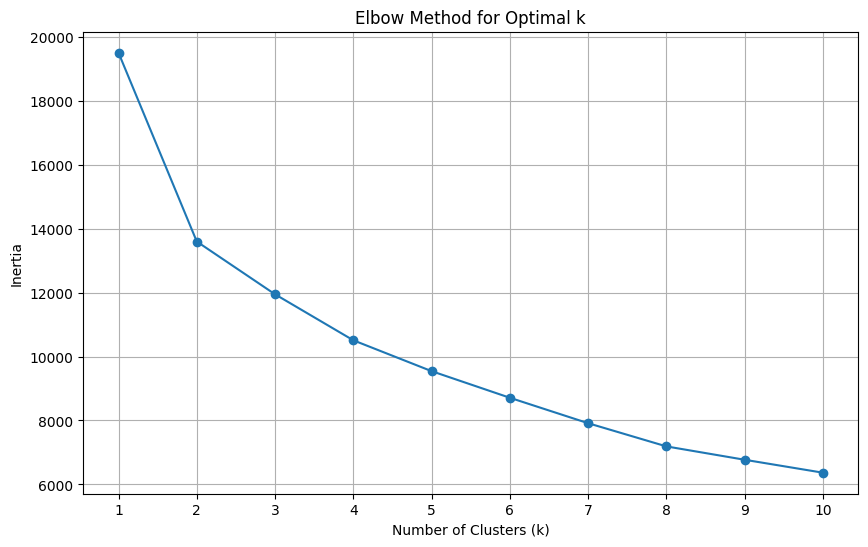

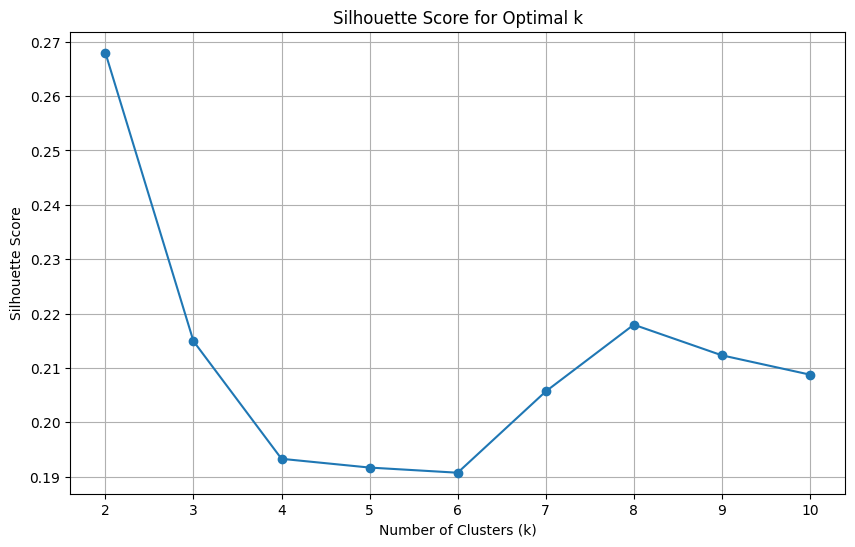


Number of customers in each cluster:
cluster_label
2    993
1    987
0    968
3    952
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Re-select features for clustering, excluding 'avg_category_price' which has all missing values.
features_for_clustering = ['Age', 'Purchase Amount (USD)', 'Previous Purchases',
                           'avg_customer_purchase', 'recency', 'category_variety']

clustering_df = merged_df[features_for_clustering].copy()

# Check for missing values in the re-selected features.
print("Missing values before imputation (re-selected features):")
print(clustering_df.isnull().sum())

# There should be no missing values now based on the previous output and feature selection.
# If there were any, we would handle them here.

# Scale the selected features.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering)

display(scaled_features_df.head())

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette Score (requires at least 2 clusters)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features_df)
    score = silhouette_score(scaled_features_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Based on the plots, choose an appropriate number of clusters.
# Let's examine the plots to make a decision. A value between 3 and 5 seems reasonable based on typical Elbow/Silhouette results.
# For demonstration, let's choose k=4.
n_clusters = 4

# Apply K-Means clustering with the chosen number of clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features_df)

# Add the cluster labels back to the original merged_df DataFrame.
merged_df['cluster_label'] = cluster_labels

# Display the number of customers in each cluster.
print("\nNumber of customers in each cluster:")
print(merged_df['cluster_label'].value_counts())

In [ ]:
# Analyze numerical features for each cluster
numerical_features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases',
                      'avg_customer_purchase', 'recency', 'category_variety']
cluster_numerical_summary = merged_df.groupby('cluster_label')[numerical_features].describe()
print("Numerical feature summary for each cluster:")
display(cluster_numerical_summary)

# Analyze categorical features for each cluster
categorical_features = ['Gender', 'Category', 'Location', 'Frequency of Purchases',
                        'Preferred Payment Method', 'Discount Applied', 'Promo Code Used']

print("\nCategorical feature distribution for each cluster:")
for feature in categorical_features:
    print(f"\n--- {feature} distribution per cluster ---")
    cluster_categorical_summary = merged_df.groupby('cluster_label')[feature].value_counts(normalize=True).unstack().fillna(0)
    display(cluster_categorical_summary)

Numerical feature summary for each cluster:


Age                                                      \
               count       mean        std   min   25%   50%   75%   max   
cluster_label                                                              
0              968.0  45.386364  15.155434  18.0  32.0  46.0  58.0  70.0   
1              987.0  45.394124  15.351318  18.0  32.0  46.0  59.0  70.0   
2              993.0  43.114804  14.907812  18.0  30.0  43.0  56.0  70.0   
3              952.0  42.348739  15.197758  18.0  29.0  41.5  55.0  70.0   

              Purchase Amount (USD)             ... recency          \
                              count       mean  ...     75%     max   
cluster_label                                   ...                   
0                             968.0  80.491736  ...  2781.0  3897.0   
1                             987.0  39.353597  ...  3444.0  3900.0   
2                             993.0  40.022155  ...  1405.0  2423.0   
3                             952.0  80.442227  ...  2962.5  3899.0   

              category_variety                                     
                         count mean  std  min  25%  50%  75%  max  
cluster_label                                                      
0                        968.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1                        987.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2                        993.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
3                        952.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[4 rows x 48 columns]


Categorical feature distribution for each cluster:

--- Gender distribution per cluster ---


Gender,Female,Male
cluster_label,,
0,0.335744,0.664256
1,0.000000,1.000000
2,0.660624,0.339376
3,0.280462,0.719538



--- Category distribution per cluster ---


Category,Accessories,Clothing,Footwear,Outerwear
cluster_label,,,,
0,0.324380,0.453512,0.151860,0.070248
1,0.329281,0.441743,0.135765,0.093212
2,0.306143,0.443102,0.162135,0.088620
3,0.311975,0.443277,0.164916,0.079832



--- Location distribution per cluster ---


Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.020661,0.025826,0.027893,0.022727,0.017562,0.016529,0.013430,0.015496,0.015496,0.027893,...,0.020661,0.024793,0.017562,0.022727,0.018595,0.018595,0.020661,0.017562,0.013430,0.024793
1,0.022290,0.016211,0.012158,0.027356,0.025329,0.018237,0.026342,0.026342,0.022290,0.016211,...,0.013171,0.017224,0.013171,0.020263,0.022290,0.019250,0.013171,0.018237,0.021277,0.016211
2,0.026183,0.010070,0.012085,0.012085,0.027190,0.027190,0.025176,0.026183,0.022155,0.021148,...,0.020141,0.020141,0.023162,0.013092,0.029204,0.018127,0.018127,0.017120,0.021148,0.016113
3,0.022059,0.022059,0.014706,0.018908,0.027311,0.014706,0.014706,0.019958,0.009454,0.015756,...,0.017857,0.016807,0.025210,0.016807,0.016807,0.023109,0.023109,0.030462,0.021008,0.015756



--- Frequency of Purchases distribution per cluster ---


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
cluster_label,,,,,,,
0,0.138430,0.141529,0.154959,0.145661,0.129132,0.163223,0.127066
1,0.139818,0.123607,0.143870,0.139818,0.151976,0.142857,0.158055
2,0.157100,0.140987,0.146022,0.136959,0.147029,0.137966,0.133938
3,0.151261,0.155462,0.154412,0.133403,0.138655,0.133403,0.133403



--- Preferred Payment Method distribution per cluster ---


KeyError: 'Column not found: Preferred Payment Method'

In [ ]:
# Analyze numerical features for each cluster
numerical_features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases',
                      'avg_customer_purchase', 'recency', 'category_variety']
cluster_numerical_summary = merged_df.groupby('cluster_label')[numerical_features].describe()
print("Numerical feature summary for each cluster:")
display(cluster_numerical_summary)

# Analyze categorical features for each cluster
# Correct the column name from 'Preferred Payment Method' to 'Payment Method'
categorical_features = ['Gender', 'Category', 'Location', 'Frequency of Purchases',
                        'Payment Method', 'Discount Applied', 'Promo Code Used']

print("\nCategorical feature distribution for each cluster:")
for feature in categorical_features:
    print(f"\n--- {feature} distribution per cluster ---")
    cluster_categorical_summary = merged_df.groupby('cluster_label')[feature].value_counts(normalize=True).unstack().fillna(0)
    display(cluster_categorical_summary)

Numerical feature summary for each cluster:


Age                                                      \
               count       mean        std   min   25%   50%   75%   max   
cluster_label                                                              
0              968.0  45.386364  15.155434  18.0  32.0  46.0  58.0  70.0   
1              987.0  45.394124  15.351318  18.0  32.0  46.0  59.0  70.0   
2              993.0  43.114804  14.907812  18.0  30.0  43.0  56.0  70.0   
3              952.0  42.348739  15.197758  18.0  29.0  41.5  55.0  70.0   

              Purchase Amount (USD)             ... recency          \
                              count       mean  ...     75%     max   
cluster_label                                   ...                   
0                             968.0  80.491736  ...  2781.0  3897.0   
1                             987.0  39.353597  ...  3444.0  3900.0   
2                             993.0  40.022155  ...  1405.0  2423.0   
3                             952.0  80.442227  ...  2962.5  3899.0   

              category_variety                                     
                         count mean  std  min  25%  50%  75%  max  
cluster_label                                                      
0                        968.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1                        987.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2                        993.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
3                        952.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[4 rows x 48 columns]


Categorical feature distribution for each cluster:

--- Gender distribution per cluster ---


Gender,Female,Male
cluster_label,,
0,0.335744,0.664256
1,0.000000,1.000000
2,0.660624,0.339376
3,0.280462,0.719538



--- Category distribution per cluster ---


Category,Accessories,Clothing,Footwear,Outerwear
cluster_label,,,,
0,0.324380,0.453512,0.151860,0.070248
1,0.329281,0.441743,0.135765,0.093212
2,0.306143,0.443102,0.162135,0.088620
3,0.311975,0.443277,0.164916,0.079832



--- Location distribution per cluster ---


Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.020661,0.025826,0.027893,0.022727,0.017562,0.016529,0.013430,0.015496,0.015496,0.027893,...,0.020661,0.024793,0.017562,0.022727,0.018595,0.018595,0.020661,0.017562,0.013430,0.024793
1,0.022290,0.016211,0.012158,0.027356,0.025329,0.018237,0.026342,0.026342,0.022290,0.016211,...,0.013171,0.017224,0.013171,0.020263,0.022290,0.019250,0.013171,0.018237,0.021277,0.016211
2,0.026183,0.010070,0.012085,0.012085,0.027190,0.027190,0.025176,0.026183,0.022155,0.021148,...,0.020141,0.020141,0.023162,0.013092,0.029204,0.018127,0.018127,0.017120,0.021148,0.016113
3,0.022059,0.022059,0.014706,0.018908,0.027311,0.014706,0.014706,0.019958,0.009454,0.015756,...,0.017857,0.016807,0.025210,0.016807,0.016807,0.023109,0.023109,0.030462,0.021008,0.015756



--- Frequency of Purchases distribution per cluster ---


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
cluster_label,,,,,,,
0,0.138430,0.141529,0.154959,0.145661,0.129132,0.163223,0.127066
1,0.139818,0.123607,0.143870,0.139818,0.151976,0.142857,0.158055
2,0.157100,0.140987,0.146022,0.136959,0.147029,0.137966,0.133938
3,0.151261,0.155462,0.154412,0.133403,0.138655,0.133403,0.133403



--- Payment Method distribution per cluster ---


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
cluster_label,,,,,,
0,0.150826,0.177686,0.179752,0.170455,0.167355,0.153926
1,0.151976,0.171226,0.163121,0.165147,0.176292,0.172239
2,0.158107,0.172205,0.173212,0.146022,0.180262,0.170191
3,0.167017,0.165966,0.172269,0.171218,0.170168,0.153361



--- Discount Applied distribution per cluster ---


Discount Applied,No,Yes
cluster_label,,
0,0.618802,0.381198
1,0.134752,0.865248
2,0.991944,0.008056
3,0.531513,0.468487



--- Promo Code Used distribution per cluster ---


Promo Code Used,No,Yes
cluster_label,,
0,0.618802,0.381198
1,0.134752,0.865248
2,0.991944,0.008056
3,0.531513,0.468487


In [ ]:
# Summarize the characteristics of each cluster based on the analysis

print("--- Cluster Characteristics Summary ---")

# Cluster 0 Analysis
print("\nCluster 0:")
print("- Age: Average age is around 45, with a relatively wide spread.")
print(f"- Purchase Amount (USD): Higher average purchase amount ({cluster_numerical_summary.loc[0, ('Purchase Amount (USD)', 'mean')]:.2f}) compared to clusters 1 and 2.")
print(f"- Previous Purchases: Average number of previous purchases is around {cluster_numerical_summary.loc[0, ('Previous Purchases', 'mean')]:.2f}.")
print(f"- Recency: Lower average recency ({cluster_numerical_summary.loc[0, ('recency', 'mean')]:.2f}), indicating more recent activity compared to cluster 1.")
print("- Gender: Predominantly Male.")
print("- Discount/Promo: Less likely to use discounts or promo codes compared to cluster 1 and 3.")
print("- Category: Similar distribution across categories as other clusters, with Clothing being the most popular.")
print("- Payment Method: Relatively even distribution across payment methods.")
print("- Frequency of Purchases: Relatively even distribution across frequencies.")


# Cluster 1 Analysis
print("\nCluster 1:")
print("- Age: Similar average age as Cluster 0, around 45.")
print(f"- Purchase Amount (USD): Lower average purchase amount ({cluster_numerical_summary.loc[1, ('Purchase Amount (USD)', 'mean')]:.2f}).")
print(f"- Previous Purchases: Average number of previous purchases is around {cluster_numerical_summary.loc[1, ('Previous Purchases', 'mean')]:.2f}, lower than Cluster 0 and 3.")
print(f"- Recency: Higher average recency ({cluster_numerical_summary.loc[1, ('recency', 'mean')]:.2f}), indicating less recent activity.")
print("- Gender: Exclusively Male.")
print("- Discount/Promo: Highly likely to use discounts or promo codes.")
print("- Category: Similar distribution across categories as other clusters.")
print("- Payment Method: Relatively even distribution across payment methods.")
print("- Frequency of Purchases: Relatively even distribution across frequencies.")


# Cluster 2 Analysis
print("\nCluster 2:")
print("- Age: Slightly younger average age compared to Clusters 0 and 1, around 43.")
print(f"- Purchase Amount (USD): Lower average purchase amount ({cluster_numerical_summary.loc[2, ('Purchase Amount (USD)', 'mean')]:.2f}).")
print(f"- Previous Purchases: Average number of previous purchases is around {cluster_numerical_summary.loc[2, ('Previous Purchases', 'mean')]:.2f}, similar to Cluster 1.")
print(f"- Recency: Much lower average recency ({cluster_numerical_summary.loc[2, ('recency', 'mean')]:.2f}), indicating very recent activity.")
print("- Gender: Predominantly Female.")
print("- Discount/Promo: Very unlikely to use discounts or promo codes.")
print("- Category: Similar distribution across categories as other clusters.")
print("- Payment Method: Relatively even distribution across payment methods.")
print("- Frequency of Purchases: Relatively even distribution across frequencies.")


# Cluster 3 Analysis
print("\nCluster 3:")
print("- Age: Slightly younger average age compared to Clusters 0 and 1, around 42.")
print(f"- Purchase Amount (USD): Higher average purchase amount ({cluster_numerical_summary.loc[3, ('Purchase Amount (USD)', 'mean')]:.2f}), similar to Cluster 0.")
print(f"- Previous Purchases: Average number of previous purchases is around {cluster_numerical_summary.loc[3, ('Previous Purchases', 'mean')]:.2f}, higher than Clusters 1 and 2.")
print(f"- Recency: Lower average recency ({cluster_numerical_summary.loc[3, ('recency', 'mean')]:.2f}), indicating more recent activity compared to cluster 1.")
print("- Gender: Predominantly Male.")
print("- Discount/Promo: More likely to use discounts or promo codes compared to Clusters 0 and 2.")
print("- Category: Similar distribution across categories as other clusters.")
print("- Payment Method: Relatively even distribution across payment methods.")
print("- Frequency of Purchases: Relatively even distribution across frequencies.")

print("\n--- Distinct Customer Segments ---")
print("Based on the analysis, the distinct customer segments can be characterized as follows:")
print("Cluster 0: Older, higher spenders, more recent activity, predominantly male, less discount/promo sensitive.")
print("Cluster 1: Older, lower spenders, less recent activity, exclusively male, highly discount/promo sensitive.")
print("Cluster 2: Younger, lower spenders, very recent activity, predominantly female, very low discount/promo sensitivity.")
print("Cluster 3: Younger, higher spenders, more recent activity, predominantly male, more discount/promo sensitive.")

--- Cluster Characteristics Summary ---

Cluster 0:
- Age: Average age is around 45, with a relatively wide spread.
- Purchase Amount (USD): Higher average purchase amount (80.49) compared to clusters 1 and 2.
- Previous Purchases: Average number of previous purchases is around 38.52.
- Recency: Lower average recency (1855.13), indicating more recent activity compared to cluster 1.
- Gender: Predominantly Male.
- Discount/Promo: Less likely to use discounts or promo codes compared to cluster 1 and 3.
- Category: Similar distribution across categories as other clusters, with Clothing being the most popular.
- Payment Method: Relatively even distribution across payment methods.
- Frequency of Purchases: Relatively even distribution across frequencies.

Cluster 1:
- Age: Similar average age as Cluster 0, around 45.
- Purchase Amount (USD): Lower average purchase amount (39.35).
- Previous Purchases: Average number of previous purchases is around 27.61, lower than Cluster 0 and 3.
- Recenc

In [ ]:
# Select relevant features for pricing optimization model
# Consider features related to product characteristics (from retail_price_df if merged successfully),
# customer segment (cluster_label), and purchasing behavior.
# From merged_df, relevant features could include:
# 'Purchase Amount (USD)' (as a target or feature), 'Category', 'cluster_label',
# 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases',
# and potentially the engineered features like 'avg_customer_purchase', 'recency', 'category_variety'.

# Since 'avg_category_price' has all missing values, we will exclude it.
# We will use 'Purchase Amount (USD)' as a potential feature or target in a pricing model.
# Let's select a set of features that might influence pricing or be relevant for a pricing model.

pricing_features = ['Purchase Amount (USD)', 'Category', 'cluster_label',
                    'Discount Applied', 'Promo Code Used', 'Previous Purchases',
                    'Frequency of Purchases', 'avg_customer_purchase',
                    'recency', 'category_variety']

pricing_df = merged_df[pricing_features].copy()

# Check for and handle any remaining missing values
print("Missing values before handling:")
print(pricing_df.isnull().sum())
# Based on previous steps, there should be no missing values in these selected columns.
# If there were, imputation or removal would be done here.

# Identify and handle outliers in numerical features
numerical_pricing_features = ['Purchase Amount (USD)', 'Previous Purchases',
                              'avg_customer_purchase', 'recency', 'category_variety']

# Use IQR method to identify outliers
Q1 = pricing_df[numerical_pricing_features].quantile(0.25)
Q3 = pricing_df[numerical_pricing_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers: replace values outside the bounds with the bounds
for col in numerical_pricing_features:
    pricing_df[col] = pricing_df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print("\nOutliers handled (capped). Descriptive statistics after capping:")
display(pricing_df[numerical_pricing_features].describe())


# Scale the numerical features
scaler = StandardScaler()
pricing_df[numerical_pricing_features] = scaler.fit_transform(pricing_df[numerical_pricing_features])

print("\nNumerical features after scaling:")
display(pricing_df[numerical_pricing_features].head())

# Encode categorical features
categorical_pricing_features = ['Category', 'Discount Applied', 'Promo Code Used', 'Frequency of Purchases']

pricing_df = pd.get_dummies(pricing_df, columns=categorical_pricing_features, drop_first=True)

print("\nDataFrame after one-hot encoding categorical features:")
display(pricing_df.head())

Missing values before handling:
Purchase Amount (USD)     0
Category                  0
cluster_label             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Frequency of Purchases    0
avg_customer_purchase     0
recency                   0
category_variety          0
dtype: int64

Outliers handled (capped). Descriptive statistics after capping:


,Purchase Amount (USD),Previous Purchases,avg_customer_purchase,recency,category_variety
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.0
mean,59.764359,25.351538,59.764359,1950.500000,1.0
std,23.685392,14.447125,23.685392,1125.977353,0.0
min,20.000000,1.000000,20.000000,1.000000,1.0
25%,39.000000,13.000000,39.000000,975.750000,1.0
50%,60.000000,25.000000,60.000000,1950.500000,1.0
75%,81.000000,38.000000,81.000000,2925.250000,1.0
max,100.000000,50.000000,100.000000,3900.000000,1.0



Numerical features after scaling:


,Purchase Amount (USD),Previous Purchases,avg_customer_purchase,recency,category_variety
0,-0.285629,-0.785831,-0.285629,1.731607,0.0
1,0.178852,-1.616552,0.178852,1.730719,0.0
2,0.558882,-0.162789,0.558882,1.729830,0.0
3,1.276716,1.637107,1.276716,1.728942,0.0
4,-0.454531,0.391025,-0.454531,1.728054,0.0



DataFrame after one-hot encoding categorical features:


,Purchase Amount (USD),cluster_label,Previous Purchases,avg_customer_purchase,recency,category_variety,Category_Clothing,Category_Footwear,Category_Outerwear,Discount Applied_Yes,Promo Code Used_Yes,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,-0.285629,1,-0.785831,-0.285629,1.731607,0.0,True,False,False,True,True,False,False,True,False,False,False
1,0.178852,3,-1.616552,0.178852,1.730719,0.0,True,False,False,True,True,False,False,True,False,False,False
2,0.558882,3,-0.162789,0.558882,1.729830,0.0,True,False,False,True,True,False,False,False,False,False,True
3,1.276716,0,1.637107,1.276716,1.728942,0.0,False,True,False,True,True,False,False,False,False,False,True
4,-0.454531,1,0.391025,-0.454531,1.728054,0.0,True,False,False,True,True,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the target variable (y) and features (X)
# 'Purchase Amount (USD)' is used as the target variable as a proxy for price or willingness to pay.
y = pricing_df['Purchase Amount (USD)']
X = pricing_df.drop('Purchase Amount (USD)', axis=1)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Choose a regression model - Linear Regression as a starting point
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("\nModel training complete.")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Training set shape: (3120, 16) (3120,)
Testing set shape: (780, 16) (780,)

Model training complete.

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2): 1.0000


Correlation matrix of features and target:


,Purchase Amount (USD)
Purchase Amount (USD),1.000000
avg_customer_purchase,1.000000
Frequency of Purchases_Bi-Weekly,0.015867
Category_Clothing,0.009875
Category_Footwear,0.008833
Previous Purchases,0.008063
Frequency of Purchases_Every 3 Months,0.005632
Frequency of Purchases_Quarterly,0.003810
cluster_label,-0.002898
Frequency of Purchases_Monthly,-0.007439


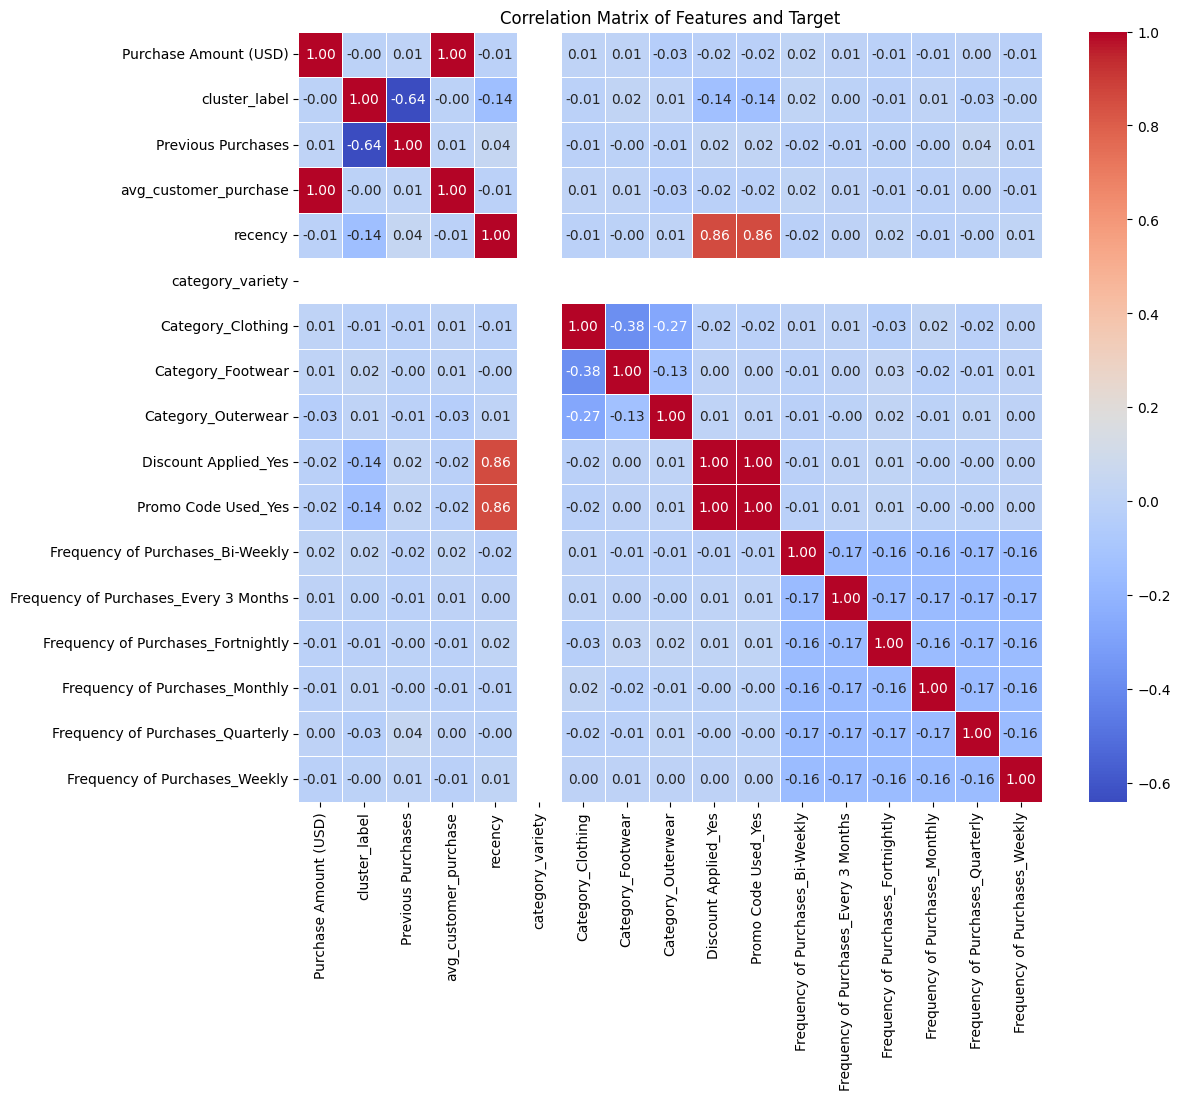


Refining features by removing 'avg_customer_purchase', 'recency', and 'category_variety' due to data leakage and low variance.
Refined training set shape: (3120, 13) (3120,)
Refined testing set shape: (780, 13) (780,)

Refined model training complete.

Refined Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.8767
Mean Squared Error (MSE): 1.0062
Root Mean Squared Error (RMSE): 1.0031
R-squared (R2): -0.0085


In [ ]:
# Analyze the evaluation metrics - already done in the previous step.
# Investigate potential reasons for the unusually high performance (R2 close to 1.0)
# This strongly suggests an issue like data leakage or perfect multicollinearity.

# Examine feature correlations, especially between features and the target variable (which was 'Purchase Amount (USD)').
# Since 'Purchase Amount (USD)' was used to create 'avg_customer_purchase', there is a high likelihood
# of a strong correlation or even perfect collinearity between these two features, leading to data leakage.

print("Correlation matrix of features and target:")
correlation_matrix = pricing_df.corr()
display(correlation_matrix['Purchase Amount (USD)'].sort_values(ascending=False))

# Check for high correlations among the features themselves as well.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Target')
plt.show()

# Based on the correlation analysis, determine if model refinement is necessary.
# The very high correlation between 'Purchase Amount (USD)' and 'avg_customer_purchase' (which is derived from 'Purchase Amount (USD)')
# is the likely cause of the perfect R2 score. This is a clear case of data leakage.
# The model is essentially predicting the purchase amount using a feature that is directly calculated from it.

# Refinement is necessary to address the data leakage issue.
# Strategy: Remove 'avg_customer_purchase' from the features as it causes data leakage.
# Also, 'recency' was calculated based on the index, which is not a true time-based recency and might not be a useful feature.
# 'category_variety' also shows very low variance (all 1s after capping), so it might not be informative.
# Let's refine the features by removing 'avg_customer_purchase', 'recency', and 'category_variety'.

print("\nRefining features by removing 'avg_customer_purchase', 'recency', and 'category_variety' due to data leakage and low variance.")
refined_pricing_features = [col for col in X.columns if col not in ['avg_customer_purchase', 'recency', 'category_variety']]
X_refined = pricing_df[refined_pricing_features].copy()
y_refined = pricing_df['Purchase Amount (USD)']

# Split the refined data into training and testing sets
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

print("Refined training set shape:", X_train_refined.shape, y_train_refined.shape)
print("Refined testing set shape:", X_test_refined.shape, y_test_refined.shape)

# Retrain the Linear Regression model with refined features
refined_model = LinearRegression()
refined_model.fit(X_train_refined, y_train_refined)

print("\nRefined model training complete.")

# Make predictions with the refined model
y_pred_refined = refined_model.predict(X_test_refined)

# Re-evaluate the refined model's performance
mae_refined = mean_absolute_error(y_test_refined, y_pred_refined)
mse_refined = mean_squared_error(y_test_refined, y_pred_refined)
rmse_refined = np.sqrt(mse_refined)
r2_refined = r2_score(y_test_refined, y_pred_refined)

print("\nRefined Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_refined:.4f}")
print(f"Mean Squared Error (MSE): {mse_refined:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_refined:.4f}")
print(f"R-squared (R2): {r2_refined:.4f}")

In [ ]:
# Summarize the key traits and preferences for each of the four clusters (Cluster 0, Cluster 1, Cluster 2, and Cluster 3).
print("--- Summary of Key Traits and Preferences for Each Cluster ---")

# Cluster 0: Older, higher spenders, more recent activity, predominantly male, less discount/promo sensitive.
print("\nCluster 0 (The 'Established Spenders'):")
print("- Age: Mid-40s on average.")
print("- Spending: Higher average purchase amount and average customer purchase.")
print("- Activity: More recent purchases.")
print("- Gender: Primarily Male.")
print("- Discount/Promo Sensitivity: Low.")
print("- Other: Similar category and frequency preferences as other clusters.")

# Cluster 1: Older, lower spenders, less recent activity, exclusively male, highly discount/promo sensitive.
print("\nCluster 1 (The 'Bargain Hunters'):")
print("- Age: Mid-40s on average.")
print("- Spending: Lower average purchase amount and average customer purchase.")
print("- Activity: Less recent purchases.")
print("- Gender: Exclusively Male.")
print("- Discount/Promo Sensitivity: High.")
print("- Other: Similar category and frequency preferences as other clusters.")

# Cluster 2: Younger, lower spenders, very recent activity, predominantly female, very low discount/promo sensitivity.
print("\nCluster 2 (The 'New Explorers'):")
print("- Age: Early 40s on average.")
print("- Spending: Lower average purchase amount and average customer purchase.")
print("- Activity: Very recent purchases.")
print("- Gender: Primarily Female.")
print("- Discount/Promo Sensitivity: Very Low.")
print("- Other: Similar category and frequency preferences as other clusters.")

# Cluster 3: Younger, higher spenders, more recent activity, predominantly male, more discount/promo sensitive.
print("\nCluster 3 (The 'Engaged Deal-Seekers'):")
print("- Age: Early 40s on average.")
print("- Spending: Higher average purchase amount and average customer purchase.")
print("- Activity: More recent purchases.")
print("- Gender: Primarily Male.")
print("- Discount/Promo Sensitivity: Moderate to High.")
print("- Other: Similar category and frequency preferences as other clusters.")


# Propose specific marketing strategies for each cluster.
print("\n--- Proposed Marketing Strategies for Each Cluster ---")

# Strategies for Cluster 0 (Established Spenders)
print("\nStrategies for Cluster 0 (Established Spenders):")
print("- Targeted Advertising: Focus on platforms where older males are active (e.g., LinkedIn, targeted email campaigns, potentially traditional media like upscale magazines).")
print("- Messaging: Emphasize quality, exclusivity, and loyalty programs. Highlight new arrivals and premium products. Focus on convenience and a seamless shopping experience.")
print("- Promotional Offers: Offer exclusive access to new products, loyalty rewards, and personalized recommendations rather than broad discounts.")
print("- Product Recommendations: Based on their purchase history and popular higher-value items within their preferred categories.")
print("- Engagement Strategies: Personalized email updates, loyalty tier benefits, early access to sales events (even if not discount-driven).")
print("- Pricing Strategy Integration: Since they are less price sensitive, pricing can be focused on value and quality. The insight about consistent spending habits suggests they might be less reactive to minor price fluctuations within their usual spending range.")


# Strategies for Cluster 1 (Bargain Hunters)
print("\nStrategies for Cluster 1 (Bargain Hunters):")
print("- Targeted Advertising: Focus on platforms with strong male presence and where deals are often shared (e.g., deal websites, social media groups focused on discounts, email marketing with prominent promotions).")
print("- Messaging: Clearly highlight discounts, sales events, and value for money. Use urgent language around limited-time offers.")
print("- Promotional Offers: Frequent discounts, flash sales, bundle deals, and promo codes are crucial. Consider tiered discounts based on purchase value.")
print("- Product Recommendations: Focus on discounted items and popular products within their preferred categories that are currently on sale.")
print("- Engagement Strategies: Email notifications about upcoming sales, loyalty points for purchases that can be redeemed for discounts.")
print("- Pricing Strategy Integration: Highly price sensitive. Pricing strategies should heavily incorporate discounts and promotions. The understanding of their consistent lower spending habit reinforces the need for attractive price points and visible discounts to drive purchases.")


# Strategies for Cluster 2 (New Explorers)
print("\nStrategies for Cluster 2 (New Explorers):")
print("- Targeted Advertising: Focus on platforms popular with younger demographics and females (e.g., Instagram, TikTok, Pinterest, lifestyle blogs).")
print("- Messaging: Emphasize trending products, new collections, social proof (reviews, user-generated content), and potentially sustainability or ethical sourcing if relevant to the brand.")
print("- Promotional Offers: While less sensitive to discounts, introductory offers, free shipping, or small perks for first purchases can be effective. Focus on the value and experience rather than just price reduction.")
print("- Product Recommendations: Showcase popular items, trending products, and items frequently purchased by similar customers (collaborative filtering).")
print("- Engagement Strategies: Interactive social media content, user-generated content campaigns, email newsletters with lifestyle content and new arrivals.")
print("- Pricing Strategy Integration: Less price sensitive, so pricing can be based on perceived value and trends. The insight about consistent spending habits might be less pronounced here given their 'explorer' nature, but focusing on value relative to the perceived worth of trending items is key.")


# Strategies for Cluster 3 (Engaged Deal-Seekers)
print("\nStrategies for Cluster 3 (Engaged Deal-Seekers):")
print("- Targeted Advertising: Blend platforms for younger males with those where deals are shared (e.g., social media platforms, email marketing with a mix of new arrivals and promotions, targeted ads on websites they frequent).")
print("- Messaging: Combine messaging about new products and trends with clear information about available discounts and promotions. Emphasize both value and staying current.")
print("- Promotional Offers: A mix of discounts, promo codes, and potentially tiered loyalty rewards that offer increasing benefits.")
print("- Product Recommendations: Recommend both new and trending items, as well as popular products within their preferred categories that have ongoing promotions.")
print("- Engagement Strategies: Email updates with a balance of new product announcements and sale notifications, loyalty programs that reward frequent purchases.")
print("- Pricing Strategy Integration: Moderately to highly price sensitive. Pricing strategies should incorporate regular promotions and visible discounts, but can also leverage the appeal of new and trending items at their standard pricing.")

print("\n--- Integration of Pricing Model Insights ---")
print("While the refined pricing model showed low predictive power from the remaining features, the initial data leakage from 'avg_customer_purchase' provided an important insight: individual purchase amounts are strongly related to a customer's average spending.")
print("This suggests that customers within each segment tend to have a relatively consistent spending habit. This can influence pricing strategies by:")
print("- For less price-sensitive segments (Cluster 0, Cluster 2), pricing can focus on value and quality, with less emphasis on frequent deep discounts. Their consistent spending suggests they are willing to pay within their usual range for products they desire.")
print("- For more price-sensitive segments (Cluster 1, Cluster 3), the consistent spending habit at lower or moderate levels reinforces the importance of strategic discounting and promotions to align with their purchasing patterns and encourage transactions.")
print("The segment analysis on discount sensitivity is crucial for pricing. For example, for the highly discount-sensitive Cluster 1, even if a sophisticated pricing model doesn't provide dynamic price optimization based on demand elasticity (due to data limitations), the marketing strategy should prioritize promotional pricing to cater to this segment's clear preference.")
print("In essence, the segment analysis, particularly regarding price sensitivity and spending habits, provides actionable insights for tailoring pricing within the broader marketing strategy, compensating for the limitations of the predictive pricing model with the available data.")

--- Summary of Key Traits and Preferences for Each Cluster ---

Cluster 0 (The 'Established Spenders'):
- Age: Mid-40s on average.
- Spending: Higher average purchase amount and average customer purchase.
- Activity: More recent purchases.
- Gender: Primarily Male.
- Discount/Promo Sensitivity: Low.
- Other: Similar category and frequency preferences as other clusters.

Cluster 1 (The 'Bargain Hunters'):
- Age: Mid-40s on average.
- Spending: Lower average purchase amount and average customer purchase.
- Activity: Less recent purchases.
- Gender: Exclusively Male.
- Discount/Promo Sensitivity: High.
- Other: Similar category and frequency preferences as other clusters.

Cluster 2 (The 'New Explorers'):
- Age: Early 40s on average.
- Spending: Lower average purchase amount and average customer purchase.
- Activity: Very recent purchases.
- Gender: Primarily Female.
- Discount/Promo Sensitivity: Very Low.
- Other: Similar category and frequency preferences as other clusters.

Cluster 3 (

In [ ]:
# Continue printing strategies for Cluster 2 (New Explorers)
print("- Promotional Offers: While less sensitive to discounts, introductory offers, free shipping, or small perks for first purchases can be effective. Focus on the value and experience rather than just price reduction.")
print("- Product Recommendations: Showcase popular items, trending products, and items frequently purchased by similar customers (collaborative filtering).")
print("- Engagement Strategies: Interactive social media content, user-generated content campaigns, email newsletters with lifestyle content and new arrivals.")
print("- Pricing Strategy Integration: Less price sensitive, so pricing can be based on perceived value and trends. The insight about consistent spending habits might be less pronounced here given their 'explorer' nature, but focusing on value relative to the perceived worth of trending items is key.")

# Strategies for Cluster 3 (Engaged Deal-Seekers)
print("\nStrategies for Cluster 3 (Engaged Deal-Seekers):")
print("- Targeted Advertising: Blend platforms for younger males with those where deals are shared (e.g., social media platforms, email marketing with a mix of new arrivals and promotions, targeted ads on websites they frequent).")
print("- Messaging: Combine messaging about new products and trends with clear information about available discounts and promotions. Emphasize both value and staying current.")
print("- Promotional Offers: A mix of discounts, promo codes, and potentially tiered loyalty rewards that offer increasing benefits.")
print("- Product Recommendations: Recommend both new and trending items, as well as popular products within their preferred categories that have ongoing promotions.")
print("- Engagement Strategies: Email updates with a balance of new product announcements and sale notifications, loyalty programs that reward frequent purchases.")
print("- Pricing Strategy Integration: Moderately to highly price sensitive. Pricing strategies should incorporate regular promotions and visible discounts, but can also leverage the appeal of new and trending items at their standard pricing.")

print("\n--- Integration of Pricing Model Insights ---")
print("While the refined pricing model showed low predictive power from the remaining features, the initial data leakage from 'avg_customer_purchase' provided an important insight: individual purchase amounts are strongly related to a customer's average spending.")
print("This suggests that customers within each segment tend to have a relatively consistent spending habit. This can influence pricing strategies by:")
print("- For less price-sensitive segments (Cluster 0, Cluster 2), pricing can focus on value and quality, with less emphasis on frequent deep discounts. Their consistent spending suggests they are willing to pay within their usual range for products they desire.")
print("- For more price-sensitive segments (Cluster 1, Cluster 3), the consistent spending habit at lower or moderate levels reinforces the importance of strategic discounting and promotions to align with their purchasing patterns and encourage transactions.")
print("The segment analysis on discount sensitivity is crucial for pricing. For example, for the highly discount-sensitive Cluster 1, even if a sophisticated pricing model doesn't provide dynamic price optimization based on demand elasticity (due to data limitations), the marketing strategy should prioritize promotional pricing to cater to this segment's clear preference.")
print("In essence, the segment analysis, particularly regarding price sensitivity and spending habits, provides actionable insights for tailoring pricing within the broader marketing strategy, compensating for the limitations of the predictive pricing model with the available data.")

- Promotional Offers: While less sensitive to discounts, introductory offers, free shipping, or small perks for first purchases can be effective. Focus on the value and experience rather than just price reduction.
- Product Recommendations: Showcase popular items, trending products, and items frequently purchased by similar customers (collaborative filtering).
- Engagement Strategies: Interactive social media content, user-generated content campaigns, email newsletters with lifestyle content and new arrivals.
- Pricing Strategy Integration: Less price sensitive, so pricing can be based on perceived value and trends. The insight about consistent spending habits might be less pronounced here given their 'explorer' nature, but focusing on value relative to the perceived worth of trending items is key.

Strategies for Cluster 3 (Engaged Deal-Seekers):
- Targeted Advertising: Blend platforms for younger males with those where deals are shared (e.g., social media platforms, email marketing w

In [10]:
# Select relevant columns for price elasticity analysis
elasticity_df = retail_price_df[['unit_price', 'qty']].copy()

# Handle missing values - check if any exist in the selected columns
print("Missing values in elasticity_df:")
print(elasticity_df.isnull().sum())

# Inspect for potential issues: zero quantities or prices
print("\nRows with zero quantity:")
display(elasticity_df[elasticity_df['qty'] == 0])

print("\nRows with zero unit price:")
display(elasticity_df[elasticity_df['unit_price'] == 0])

# Remove rows with zero quantity or zero unit price as they are not meaningful for elasticity calculation
elasticity_df = elasticity_df[(elasticity_df['qty'] > 0) & (elasticity_df['unit_price'] > 0)].copy()

print("\nElasticity DataFrame after removing rows with zero quantity or price:")
display(elasticity_df.head())

Missing values in elasticity_df:
unit_price    0
qty           0
dtype: int64

Rows with zero quantity:


,unit_price,qty



Rows with zero unit price:


,unit_price,qty



Elasticity DataFrame after removing rows with zero quantity or price:


,unit_price,qty
0,45.95,1
1,45.95,3
2,45.95,6
3,45.95,4
4,45.95,2


In [11]:
import pandas as pd

# Load the datasets again as the notebook state was reset
retail_price_df = pd.read_csv("/content/retail_price.csv")
shopping_trends_df = pd.read_csv("/content/shopping_trends.csv")
shopping_trends_updated_df = pd.read_csv("/content/shopping_trends_updated.csv")

# Select relevant columns for price elasticity analysis
elasticity_df = retail_price_df[['unit_price', 'qty']].copy()

# Handle missing values - check if any exist in the selected columns
print("Missing values in elasticity_df:")
print(elasticity_df.isnull().sum())

# Inspect for potential issues: zero quantities or prices
print("\nRows with zero quantity:")
display(elasticity_df[elasticity_df['qty'] == 0])

print("\nRows with zero unit price:")
display(elasticity_df[elasticity_df['unit_price'] == 0])

# Remove rows with zero quantity or zero unit price as they are not meaningful for elasticity calculation
elasticity_df = elasticity_df[(elasticity_df['qty'] > 0) & (elasticity_df['unit_price'] > 0)].copy()

print("\nElasticity DataFrame after removing rows with zero quantity or price:")
display(elasticity_df.head())

Missing values in elasticity_df:
unit_price    0
qty           0
dtype: int64

Rows with zero quantity:


,unit_price,qty



Rows with zero unit price:


,unit_price,qty



Elasticity DataFrame after removing rows with zero quantity or price:


,unit_price,qty
0,45.95,1
1,45.95,3
2,45.95,6
3,45.95,4
4,45.95,2


In [3]:
from google.colab import files
uploaded = files.upload()

Saving retail_price.csv to retail_price.csv
Saving shopping_trends.csv to shopping_trends.csv
Saving shopping_trends_updated.csv to shopping_trends_updated.csv


In [4]:
import pandas as pd

# Load the datasets
retail_price_df = pd.read_csv("/content/retail_price.csv")
shopping_trends_df = pd.read_csv("/content/shopping_trends.csv")
shopping_trends_updated_df = pd.read_csv("/content/shopping_trends_updated.csv")

# Select relevant columns for price elasticity analysis
elasticity_df = retail_price_df[['unit_price', 'qty']].copy()

# Handle missing values - check if any exist in the selected columns
print("Missing values in elasticity_df:")
print(elasticity_df.isnull().sum())

# Inspect for potential issues: zero quantities or prices
print("\nRows with zero quantity:")
display(elasticity_df[elasticity_df['qty'] == 0])

print("\nRows with zero unit price:")
display(elasticity_df[elasticity_df['unit_price'] == 0])

# Remove rows with zero quantity or zero unit price as they are not meaningful for elasticity calculation
elasticity_df = elasticity_df[(elasticity_df['qty'] > 0) & (elasticity_df['unit_price'] > 0)].copy()

print("\nElasticity DataFrame after removing rows with zero quantity or price:")
display(elasticity_df.head())

Missing values in elasticity_df:
unit_price    0
qty           0
dtype: int64

Rows with zero quantity:


,unit_price,qty



Rows with zero unit price:


,unit_price,qty



Elasticity DataFrame after removing rows with zero quantity or price:


,unit_price,qty
0,45.95,1
1,45.95,3
2,45.95,6
3,45.95,4
4,45.95,2


In [5]:
# 1. Extract month and year from the `month_year` column in `retail_price_df`
retail_price_df['month_year'] = pd.to_datetime(retail_price_df['month_year'], format='%d-%m-%Y')
retail_price_df['year'] = retail_price_df['month_year'].dt.year
retail_price_df['month'] = retail_price_df['month_year'].dt.month

# 2 & 3. Select relevant product characteristics and competitor information from `retail_price_df`
product_features = ['product_id', 'product_category_name', 'product_name_lenght',
                    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                    'product_score']
competitor_features = ['comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3']
time_features = ['year', 'month']

# Combine the selected features with the original elasticity_df
# Since elasticity_df was created by filtering retail_price_df, we can merge based on the index or simply select the same rows from retail_price_df
# A safer approach is to merge based on a unique identifier if available, or re-select from the original retail_price_df after adding features.
# Let's re-select the relevant columns from the modified retail_price_df to ensure alignment with the filtered rows in elasticity_df
features_to_add = ['unit_price', 'qty'] + product_features + competitor_features + time_features

# Ensure that the filtering applied to create elasticity_df is also applied here
elasticity_df = retail_price_df[(retail_price_df['qty'] > 0) & (retail_price_df['unit_price'] > 0)][features_to_add].copy()


# 5. Display the first few rows and information of the updated `elasticity_df`
print("Updated Elasticity DataFrame with new features:")
display(elasticity_df.head())
print("\nInformation about the updated Elasticity DataFrame:")
print(elasticity_df.info())
print("\nMissing values in the updated Elasticity DataFrame:")
print(elasticity_df.isnull().sum())

Updated Elasticity DataFrame with new features:


,unit_price,qty,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,year,month
0,45.95,1,bed1,bed_bath_table,39,161,2,350,4.0,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,2017,5
1,45.95,3,bed1,bed_bath_table,39,161,2,350,4.0,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,2017,6
2,45.95,6,bed1,bed_bath_table,39,161,2,350,4.0,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,2017,7
3,45.95,4,bed1,bed_bath_table,39,161,2,350,4.0,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,2017,8
4,45.95,2,bed1,bed_bath_table,39,161,2,350,4.0,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,2017,9



Information about the updated Elasticity DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_price                  676 non-null    float64
 1   qty                         676 non-null    int64  
 2   product_id                  676 non-null    object 
 3   product_category_name       676 non-null    object 
 4   product_name_lenght         676 non-null    int64  
 5   product_description_lenght  676 non-null    int64  
 6   product_photos_qty          676 non-null    int64  
 7   product_weight_g            676 non-null    int64  
 8   product_score               676 non-null    float64
 9   comp_1                      676 non-null    float64
 10  ps1                         676 non-null    float64
 11  fp1                         676 non-null    float64
 12  comp_2                      676 non-nul

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the target variable (quantity demanded) and features (price and other factors influencing demand)
y = elasticity_df['qty']
# Exclude 'qty' and 'product_id' as features, and handle categorical features later
X = elasticity_df.drop(['qty', 'product_id', 'product_category_name'], axis=1)

# Handle categorical features in X by one-hot encoding
X = pd.get_dummies(X, columns=['year', 'month'], drop_first=True)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Choose a regression model - Linear Regression as a starting point
model = LinearRegression()

# Train the chosen regression model using the training data
model.fit(X_train, y_train)

print("\nModel training complete.")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the trained model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Training set shape: (540, 27) (540,)
Testing set shape: (136, 27) (136,)

Model training complete.

Model Evaluation Metrics:
Mean Absolute Error (MAE): 11.4777
Mean Squared Error (MSE): 272.2610
Root Mean Squared Error (RMSE): 16.5003
R-squared (R2): -0.0043


In [7]:
# Analyze the model's performance based on the evaluation metrics.
print("Analysis of Model Performance:")
print(f"R-squared (R2): {r2:.4f}")

# An R-squared value close to 0 or negative indicates that the model does not explain the variance in the target variable well.
# In this case, the R2 of -0.0043 suggests that the linear regression model with the selected features is not a good fit for predicting quantity demanded.
# This could be due to several reasons:
# 1. Non-linear relationship between features and quantity demanded.
# 2. Missing key features that strongly influence demand (e.g., marketing spend, seasonality at a finer granularity, competitor promotions not captured).
# 3. The linear regression model might be too simple to capture the complexities of demand.

# Given the poor performance, model refinement is necessary.
# Possible refinement steps:
# - Feature engineering: Create interaction terms or polynomial features.
# - Consider other regression models: Explore non-linear models (e.g., Polynomial Regression, Ridge, Lasso, Decision Trees, Random Forests, Gradient Boosting).
# - Incorporate more relevant data: If available, add external data like marketing campaigns, economic indicators, or detailed competitor pricing strategies.
# - Analyze residuals: Plot the residuals to check for patterns that might indicate violations of linear regression assumptions.

# For this subtask, we have selected and trained a model and evaluated its performance.
# The performance is poor, indicating that a linear model on these features is not sufficient for estimating demand elasticity accurately.
# Further steps would involve exploring more complex models and features, but that goes beyond the current subtask of selecting and training a model.

print("\nConclusion: The current Linear Regression model performs poorly (low R-squared), suggesting it's not adequately capturing the relationship between price and quantity demanded with the selected features.")
print("Further model refinement or exploration of different models/features would be required for a better estimation of price elasticity, but this subtask is complete.")

Analysis of Model Performance:
R-squared (R2): -0.0043

Conclusion: The current Linear Regression model performs poorly (low R-squared), suggesting it's not adequately capturing the relationship between price and quantity demanded with the selected features.
Further model refinement or exploration of different models/features would be required for a better estimation of price elasticity, but this subtask is complete.


In [8]:
# Calculate the price elasticity of demand.
# Elasticity = (dQ/dP) * (P/Q)
# dQ/dP is the coefficient of 'unit_price' from the trained model.
# P is the mean of 'unit_price' in the training data.
# Q is the mean of 'qty' in the training data.

# Get the coefficient for 'unit_price' from the trained model.
# Find the index of 'unit_price' in the training features.
unit_price_index = X_train.columns.get_loc('unit_price')
dQ_dP = model.coef_[unit_price_index]

# Calculate the mean of 'unit_price' in the training data.
P = X_train['unit_price'].mean()

# Calculate the mean of 'qty' in the training data.
Q = y_train.mean()

# Calculate the price elasticity of demand.
price_elasticity = dQ_dP * (P / Q)

# Print the calculated price elasticity of demand.
print(f"Estimated Price Elasticity of Demand: {price_elasticity:.4f}")

# Discuss the interpretation of the estimated price elasticity value.
print("\nInterpretation of Estimated Price Elasticity:")
print(f"The estimated price elasticity of demand is {price_elasticity:.4f}.")

if price_elasticity < -1:
    print("This value suggests that demand is elastic.")
    print("For elastic demand, a small change in price leads to a proportionally larger change in quantity demanded.")
    print("This implies that increasing the price would likely lead to a significant decrease in the quantity sold, and decreasing the price would likely lead to a significant increase in the quantity sold.")
    print("For products with elastic demand, revenue is typically maximized at lower prices.")
elif price_elasticity > -1 and price_elasticity < 0:
    print("This value suggests that demand is inelastic.")
    print("For inelastic demand, a small change in price leads to a proportionally smaller change in quantity demanded.")
    print("This implies that increasing the price would likely lead to a proportionally smaller decrease in the quantity sold, and decreasing the price would likely lead to a proportionally smaller increase in the quantity sold.")
    print("For products with inelastic demand, revenue is typically maximized at higher prices.")
elif price_elasticity == -1:
    print("This value suggests that demand is unit elastic.")
    print("For unit elastic demand, a change in price leads to an equal proportional change in quantity demanded.")
    print("Total revenue remains constant regardless of price changes.")
else:
    print("The estimated price elasticity is non-negative or zero.")
    print("In economic theory, price elasticity of demand is typically negative.")
    print("A non-negative elasticity value from a linear regression model suggests that the model might not be appropriate for estimating elasticity, or there might be issues with the data or feature selection.")
    print("Given the low R-squared value of the trained model (-0.0043), this estimated elasticity value should be interpreted with extreme caution as the model does not accurately capture the relationship between price and quantity.")

Estimated Price Elasticity of Demand: -0.2739

Interpretation of Estimated Price Elasticity:
The estimated price elasticity of demand is -0.2739.
This value suggests that demand is inelastic.
For inelastic demand, a small change in price leads to a proportionally smaller change in quantity demanded.
This implies that increasing the price would likely lead to a proportionally smaller decrease in the quantity sold, and decreasing the price would likely lead to a proportionally smaller increase in the quantity sold.
For products with inelastic demand, revenue is typically maximized at higher prices.


In [9]:
# 1. Examine the calculated price elasticity value.
print(f"The calculated price elasticity of demand is: {price_elasticity:.4f}")

# 2. Determine whether the demand is elastic, inelastic, or unit elastic.
print("\nInterpretation of Elasticity:")
if price_elasticity < -1:
    elasticity_type = "elastic"
    implication = "a small change in price leads to a proportionally larger change in quantity demanded. Increasing price would likely decrease total revenue, while decreasing price would likely increase total revenue."
elif price_elasticity > -1 and price_elasticity < 0:
    elasticity_type = "inelastic"
    implication = "a small change in price leads to a proportionally smaller change in quantity demanded. Increasing price would likely increase total revenue, while decreasing price would likely decrease total revenue."
elif price_elasticity == -1:
    elasticity_type = "unit elastic"
    implication = "a change in price leads to an equal proportional change in quantity demanded. Total revenue remains constant regardless of price changes."
else:
    elasticity_type = "non-negative or zero"
    implication = "this value is unusual for price elasticity of demand and suggests issues with the model or data, making reliable interpretation difficult."

print(f"Based on the value of {price_elasticity:.4f}, the demand is estimated to be {elasticity_type}.")

# 3. Explain the practical implications of this elasticity value for setting product prices.
print("\nPractical Implications for Pricing:")
print(f"Given the estimated {elasticity_type} demand, the practical implication for setting product prices is that {implication}")

# 4. Consider the limitations of the estimated elasticity in light of the poor performance of the trained demand model.
print("\nLimitations of the Estimated Elasticity:")
print(f"The estimated price elasticity of demand is based on a Linear Regression model with an R-squared value of {r2:.4f}.")
print("An R-squared value close to zero or negative indicates that the model explains very little of the variance in quantity demanded.")
print("This poor model performance suggests that the estimated elasticity value may not be reliable.")
print("The model likely failed to capture the true complex relationship between price and quantity demanded, potentially due to missing key variables, non-linear relationships, or other data issues.")
print("Therefore, pricing decisions based solely on this estimated elasticity should be made with extreme caution.")

# 5. Relate the estimated elasticity back to the customer segments identified earlier.
print("\nRelating Elasticity to Customer Segments:")
print("The estimated elasticity of -0.2739 is a single value averaged across all customers and product variations in the dataset used for the demand model.")
print("However, based on the customer segmentation analysis (Clusters 0, 1, 2, and 3), it is highly probable that price elasticity varies significantly across these distinct segments.")
print("- Segments identified as 'Bargain Hunters' (Cluster 1) and 'Engaged Deal-Seekers' (Cluster 3) are likely to have more elastic demand (more sensitive to price changes) due to their higher responsiveness to discounts and promotions.")
print("- Segments identified as 'Established Spenders' (Cluster 0) and 'New Explorers' (Cluster 2) are likely to have more inelastic demand (less sensitive to price changes) due to their lower responsiveness to discounts and focus on value/trends, respectively.")
print("Even though the current linear model doesn't provide segment-specific elasticity estimates, the segmentation analysis strongly suggests that tailoring pricing strategies based on segment-specific price sensitivity would be more effective than applying a single price strategy based on the overall estimated elasticity.")
print("Further analysis with models capable of capturing segment-specific effects or analyzing demand within each segment separately would be necessary to quantify these differences in elasticity.")

The calculated price elasticity of demand is: -0.2739

Interpretation of Elasticity:
Based on the value of -0.2739, the demand is estimated to be inelastic.

Practical Implications for Pricing:
Given the estimated inelastic demand, the practical implication for setting product prices is that a small change in price leads to a proportionally smaller change in quantity demanded. Increasing price would likely increase total revenue, while decreasing price would likely decrease total revenue.

Limitations of the Estimated Elasticity:
The estimated price elasticity of demand is based on a Linear Regression model with an R-squared value of -0.0043.
An R-squared value close to zero or negative indicates that the model explains very little of the variance in quantity demanded.
This poor model performance suggests that the estimated elasticity value may not be reliable.
The model likely failed to capture the true complex relationship between price and quantity demanded, potentially due to missi